In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


%config InlineBackend.figure_format = "svg"
%config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")
plt.rcParams["font.family"] = "Calibri"

def save_fig(fig=None, path=None, bbox_inches="tight", dpi=400, **kwargs):
    if path is None:
        path = "temp"
    if fig is None:
        fig = plt.gcf()
    Path(path).parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(f"{path}.png", dpi=400, **kwargs)
    fig.savefig(f"{path}.pdf", dpi=400, **kwargs)
    fig.savefig(f"{path}.svg", dpi=400, **kwargs)
    plt.close(fig)

In [2]:
score_save_dir = Path("results/Meta_Prot/score/")
held_out_training_score_df = pd.read_csv(score_save_dir / "train_score.csv")
held_out_testing_score_df = pd.read_csv(score_save_dir / "test_score.csv")

score_metrics_df = pd.read_csv("results/Meta_Prot/CombinationModels.csv")
# held_out_testing_score_df
score_metrics_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,N,N_case,N_control,method,group
0,0.761748,0.773961,0.747505,0.661137,0.668581,0.653733,0.493100,0.500670,0.483493,0.728938,0.754374,0.696734,0.656919,0.663897,0.650754,0.162850,0.178307,0.147067,13985,819.0,13166.0,RF,base
1,0.768866,0.787248,0.753757,0.769539,0.776335,0.761705,0.553144,0.561780,0.544035,0.628816,0.668278,0.596160,0.778293,0.784235,0.771781,0.204478,0.225494,0.178535,13985,819.0,13166.0,Prot,base
2,0.728642,0.742495,0.711928,0.592492,0.600461,0.585368,0.454491,0.461093,0.447939,0.764347,0.794557,0.735893,0.581802,0.589493,0.574291,0.150948,0.164711,0.130793,13985,819.0,13166.0,Meta,base
3,0.633175,0.649808,0.615702,0.567839,0.576154,0.561843,0.429583,0.434709,0.422633,0.643819,0.676633,0.615516,0.563105,0.569631,0.555247,0.095786,0.105054,0.085099,13930,817.0,13113.0,PRS,base
4,0.571701,0.595393,0.551157,0.464429,0.474225,0.455614,0.370820,0.378748,0.363597,0.669697,0.707322,0.635939,0.451613,0.461599,0.442521,0.070215,0.077069,0.061875,11231,660.0,10571.0,SomtRF,base
5,0.784042,0.798547,0.770583,0.661737,0.668629,0.654546,0.497609,0.505807,0.488916,0.768666,0.794018,0.736811,0.655075,0.663035,0.646322,0.188515,0.208979,0.162513,13930,817.0,13113.0,RF + PRS,+ PRS
6,0.804782,0.821151,0.791614,0.735463,0.742371,0.728995,0.542629,0.551565,0.534059,0.734394,0.762460,0.708215,0.735530,0.742681,0.727970,0.235947,0.262520,0.201919,13930,817.0,13113.0,RF + PRS + Prot,+ PRS + Prot
7,0.791022,0.806502,0.776464,0.732950,0.739846,0.725915,0.538359,0.548661,0.530135,0.713586,0.745876,0.683406,0.734157,0.741026,0.726776,0.201121,0.224527,0.180031,13930,817.0,13113.0,RF + PRS + Meta,+ PRS + Meta
8,0.805552,0.820078,0.792750,0.774085,0.780781,0.767550,0.564212,0.574592,0.555091,0.682987,0.720381,0.658857,0.779761,0.787070,0.772310,0.237809,0.266776,0.204301,13930,817.0,13113.0,RF + PRS + Prot + Meta,+ PRS + Prot + Meta
9,0.809319,0.824939,0.795868,0.762443,0.769836,0.755558,0.558918,0.568868,0.547698,0.707576,0.743666,0.678141,0.765869,0.773961,0.758772,0.231402,0.256076,0.197383,11231,660.0,10571.0,RF + PRS + Prot + Meta + SomaRF,+ PRS + Prot + Meta + SomaRF


In [3]:
datacols = pd.read_pickle(
    "/home/xutingfeng/ukb/project/ppp_prediction/results/Meta_Prot/dataset/clean_data_cols.pkl"
)
phenos = pd.read_feather(
    "/home/xutingfeng/ukb/ukbData/MultiOmicsDiseasePrediction/data/held_out_df.feather"
)[["eid"] + datacols["pheno"] + datacols["RF"]]
phenos

,eid,height,weight,BSA,genotype_array,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,dbp_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension,future_cad_time_days,future_cad_time_months,future_cad_time_years,Ethnic,PCSK9_Carrier,APOB_Carrier,LDLR_Carrier,FH_Carrier,ASCVD,PCE,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes
0,1000127,172.7,74.6,1.891753,2.0,-10.6816,4.53573,-2.247810,1.162620,-2.31578,-0.282453,-0.145657,-1.323520,-2.012690,0.387126,10.0,2025.0,86.0,86.0,137.0,6.336,1.226,1.670,3.874,1.050,0.0,0.0,1.99,96.951663,86.6,0.0,NaT,1962-11-01,2008-10-14,NaT,NaN,NaN,45.983562,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5685 days 10:23:13.067225,190.0,16.0,None,NaN,NaN,NaN,NaN,NaN,NaN,45.0,1.0,3.874,1.670000,6.336,1.226,137.0,25.0123,0.0,0.0
1,1000149,168.0,70.8,1.817691,2.0,-13.2505,3.84572,-2.104150,1.137910,-4.06172,1.287700,0.852544,-0.087278,-1.096480,-0.373635,7.0,2916.0,71.0,71.0,121.0,5.489,2.113,1.551,3.240,0.942,0.0,0.0,0.71,85.033599,92.2,0.0,NaT,1954-08-01,2008-10-01,NaT,NaN,NaN,54.205479,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5698 days 10:23:13.067240,190.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.042153,54.0,1.0,3.240,1.551000,5.489,2.113,121.0,25.0850,0.0,0.0
2,1000957,174.0,89.0,2.074046,2.0,-12.0745,5.56310,0.862391,1.100560,-3.50587,-0.942154,0.850565,-1.063120,0.545805,2.013150,16.0,3481.0,81.0,81.0,138.0,5.537,1.834,1.321,3.551,1.043,0.0,0.0,1.10,89.114040,86.4,0.0,NaT,1949-09-01,2008-11-19,NaT,NaN,NaN,59.257534,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5649 days 10:23:13.067950,189.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.094557,59.0,1.0,3.551,1.321000,5.537,1.834,138.0,30.3923,1.0,0.0
3,1001009,165.0,52.0,1.543805,2.0,-13.1152,3.14287,-1.544290,0.651659,-3.30173,-2.130740,0.303505,-3.045830,4.661680,2.171330,3.0,2809.0,55.0,55.0,119.0,4.881,1.256,1.794,2.805,0.796,0.0,0.0,0.20,96.712481,65.4,0.0,NaT,1955-03-01,2008-06-10,NaT,NaN,NaN,53.315068,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5811 days 10:23:13.067991,194.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.010366,53.0,0.0,2.805,1.794000,4.881,1.256,119.0,19.0633,1.0,0.0
4,1001289,165.0,73.5,1.835415,2.0,-14.1667,2.08543,-3.651410,2.270160,-2.66200,0.061171,0.921577,-0.393460,-1.504160,-2.113620,2.0,2500.0,83.0,83.0,118.0,4.562,1.021,1.214,2.790,0.952,0.0,0.0,1.46,89.434145,70.9,0.0,NaT,1959-04-01,2009-10-29,NaT,NaN,NaN,50.613699,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5305 days 10:23:13.068191,177.0,15.0,White,0.0,0.0,0.0,0.0,0.0,0.010889,50.0,0.0,2.790,1.214000,4.562,1.021,118.0,26.9972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28872,6023681,175.0,69.3,1.835415,2.0,-12.6840,5.74122,-1.648850,-3.584390,-7.57779,-1.788150,-2.010070,-0.947703,0.051885,0.639438,16.0,2304.0,69.0,69.0,109.0,7.161,0.801,1.985,4.279,1.214,0.0,0.0,0.26,111.491563,51.4,0.0,NaT,1960-11-01,2009-06-10,NaT,NaN,NaN,48.638356,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5446 days 10:23:18.046524,182.0,15.0,White,0.0,0.0,0.0,0.0,0.0,0.007759,48.0,0.0,4.279,1.985000,7.161,0.801,109.0,22.6286,0.0,0.0
28873,6024012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,68.0,1.0,2.363,0.927000,3.670,1.324,121.0,26.7284,0.0,0.0
28874,6024020,160.0,47.4,1.451436,2.0,-14.8866,3.79756,-0.417654,2.870460,5.88984,-1.412350,-0.199914,0.087379,4.877630,-2.595540,5.0,2304.0,88.0,88.0,149.0,4.928,0.774,1.780,2.782,0.764,0.0,0.0,0.90,90.24

In [4]:
def split_method(x):
    split_x = x.split(" ")
    if len(split_x) == 1:
        return "base"
    else:
        return " ".join(x.split(" ")[1:])


held_out_testing_score_df

,eid,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,RF + PRS + Prot + Meta + SomaRF
0,1492817,0.079168,0.319107,0.111834,1.631688,0.056097,0.102969,0.135405,0.113446,0.137779,0.136508
1,5882986,-0.094849,0.148448,-0.139695,1.211318,0.046768,0.039524,0.075449,0.026902,0.067061,0.067267
2,4778091,-0.091549,0.004252,-0.082892,0.874289,0.036335,0.024379,0.040427,0.019704,0.037286,0.034919
3,1815527,-0.132070,0.022466,-0.190256,0.792252,0.047294,0.010357,0.035493,-0.006719,0.025958,0.027146
4,4712946,0.013174,-0.032008,-0.040549,1.166203,0.050331,0.064405,0.058194,0.057941,0.055474,0.054100
...,...,...,...,...,...,...,...,...,...,...,...
14434,2284467,-0.191189,-0.462078,-0.212490,0.853338,NaN,-0.001536,-0.037438,-0.017376,-0.042184,NaN
14435,1682258,0.032946,0.162988,-0.086313,1.199167,0.039324,0.070913,0.089639,0.056377,0.081368,0.077914
14436,1916401,-0.003075,-0.144162,0.068270,1.049148,NaN,0.054794,0.035379,0.065216,0.041605,NaN
14437,1994236,0.000074,-0.076206,0.082978,1.558578,0.050814,0.079722,0.067531,0.091989,0.073920,0.071835


In [5]:
event_col = "incident_cad"
time_col = "future_cad_time_years"

In [84]:
score = held_out_testing_score_df.merge(phenos, on="eid")
train_score = held_out_training_score_df.merge(phenos, on="eid")
methods = held_out_testing_score_df.columns[1:].tolist()
methods

['RF',
 'Prot',
 'Meta',
 'PRS',
 'SomtRF',
 'RF + PRS',
 'RF + PRS + Prot',
 'RF + PRS + Meta',
 'RF + PRS + Prot + Meta',
 'RF + PRS + Prot + Meta + SomaRF']

In [85]:
train_mean = train_score[methods]
train_std = train_score[methods].std()

score[[f"{i}:zscore" for i in methods]] = (
    (score[methods] - train_mean) / train_std
).values

train_score[[f"{i}:zscore" for i in methods]] = (
    (train_score[methods] - train_mean) / train_std
).values
score

,eid,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,RF + PRS + Prot + Meta + SomaRF,height,weight,BSA,genotype_array,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,dbp_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension,future_cad_time_days,future_cad_time_months,future_cad_time_years,Ethnic,PCSK9_Carrier,APOB_Carrier,LDLR_Carrier,FH_Carrier,ASCVD,PCE,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes,RF:zscore,Prot:zscore,Meta:zscore,PRS:zscore,SomtRF:zscore,RF + PRS:zscore,RF + PRS + Prot:zscore,RF + PRS + Meta:zscore,RF + PRS + Prot + Meta:zscore,RF + PRS + Prot + Meta + SomaRF:zscore
0,1492817,0.079168,0.319107,0.111834,1.631688,0.056097,0.102969,0.135405,0.113446,0.137779,0.136508,183.0,84.0,2.066398,2.0,-9.21715,2.50132,6.53861,-12.286900,-8.62668,7.950510,-4.154700,15.349500,1.425060,-3.553490,8.0,2401.0,95.0,95.0,165.0,4.846,1.215,1.304,2.982,0.879,0.0,0.0,3.43,107.588388,72.7,0.0,NaT,1958-10-01,2008-10-04,NaT,NaN,NaN,50.043836,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5695 days 10:23:13.718356,190.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.099445,49.0,1.0,2.982,1.304000,4.846,1.215,165.0,25.0829,2.0,0.0,0.690485,1.303871,1.339186,0.798614,1.004922,0.964852,1.438519,1.283246,1.536367,1.595712
1,5882986,-0.094849,0.148448,-0.139695,1.211318,0.046768,0.039524,0.075449,0.026902,0.067061,0.067267,179.0,102.1,2.253140,2.0,-12.43100,4.34671,-3.44632,3.673030,7.79434,-1.088290,-0.491902,0.863462,0.438468,0.245743,3.0,2601.0,72.0,72.0,117.0,6.403,0.811,1.618,4.210,1.214,0.0,0.0,4.03,105.810438,59.1,0.0,NaT,1956-08-01,2008-04-17,NaT,NaN,NaN,51.745205,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5865 days 10:23:17.935989,196.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035562,51.0,0.0,4.210,1.618000,6.403,0.811,117.0,31.8654,2.0,0.0,-0.835289,0.711180,-2.697054,-0.750485,NaN,-1.075803,0.039956,-1.913127,-0.394666,NaN
2,4778091,-0.091549,0.004252,-0.082892,0.874289,0.036335,0.024379,0.040427,0.019704,0.037286,0.034919,173.0,70.6,1.841934,2.0,-12.08050,2.83367,-2.34520,-0.658979,3.15210,1.767420,-0.525408,0.940101,1.223780,1.258910,13.0,2500.0,80.0,80.0,128.0,4.884,1.514,NaN,2.680,0.786,0.0,0.0,0.77,99.182555,82.8,0.0,NaT,1959-01-01,2009-07-15,NaT,NaN,NaN,50.569863,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5411 days 10:23:17.050110,181.0,15.0,White,0.0,0.0,0.0,0.0,0.0,0.028352,50.0,1.0,2.680,1.447676,4.884,1.514,128.0,23.5892,0.0,0.0,0.258339,1.327268,-1.164894,1.125120,NaN,0.711252,1.432399,0.117753,1.130772,NaN
3,1815527,-0.132070,0.022466,-0.190256,0.792252,0.047294,0.010357,0.035493,-0.006719,0.025958,0.027146,168.0,75.3,1.874567,2.0,-12.91150,3.06833,-2.40977,0.319129,1.17864,-0.980264,2.854140,2.042630,-4.114240,1.496570,17.0,3364.0,82.0,82.0,139.0,5.986,1.107,NaN,3.085,0.915,0.0,0.0,0.89,84.520751,71.3,0.0,NaT,1948-11-01,2007-10-01,NaT,NaN,NaN,58.953425,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,6064 days 10:23:14.085937,203.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035299,58.0,0.0,3.085,1.447676,5.986,1.107,139.0,26.1500,0.0,0.0,0.198319,1.192707,-0.031214,1.781543,0.338989,0.935050,1.525803,0.812495,1.429743,1.475632
4,4712946,0.013174,-0.032008,-0.040549,1.166203,0.050331,0.064405,0.058194,0.057941,0.055474,0.054100,161.0,57.0,1.596611,2.0,-13.22750,4.87999,-1.51896,6.315530,19.39780,2.451040,-0.668802,-1.484790,-0.950794,-0.846437,15.0,3600.0,92.0,92.0,182.0,6.212,1.933,1.547,3.886,1.050,0.0,0.0,7.54,100.884100,57.1,0.0,NaT,1947-04-01,2007-12-22,NaT,NaN,NaN,60.767123,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5982 days 10:23:16.995790,200.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.070264,60.0,0.0,3.886,1.547000,6.212,1.933,182.0,21.9899,1.0,0.0,0.652410,0.757483,0.465586,1.557841,NaN,1.252133,1.263836,1.199956,1.241997,NaN
...,...,...,...,...,...,...

In [87]:
score.shape, train_score.shape

((14439, 88), (14438, 88))

## kdeplot

In [8]:
plt.get_cmap("Set1")([0, 2]).tolist()

[[0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0],
 [0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0]]

In [10]:
def plot_all_methods_kde(
    df, label_col, label_map=None, score_cols=None, cmap="Set1", axes=None
):
    if score_cols is None:
        score_cols = [
            i for i in df.columns[1:].tolist() if i != label_col
        ]  # first is eid
    if isinstance(score_cols, str):
        score_cols = [score_cols]
    if label_map is not None:
        df[label_col] = df[label_col].map(label_map)
    ncol = 4
    nrow = len(score_cols) // ncol + 1
    if axes is None:
        fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 4))
        axes = axes.flatten()
    else:
        assert len(axes) == len(score_cols)

    # colors = sns.color_palette(cmap)[0:2]
    colors = plt.get_cmap(cmap)([0, 2]).tolist()
    for idx, col in enumerate(score_cols):
        ax = axes[idx]
        plt_data = df[[col, label_col]].copy().dropna()

        sns.kdeplot(
            data=plt_data,
            x=col,
            ax=ax,
            palette=colors,
            hue=label_col,
            fill=True,
            common_norm=False,
        )
        ax.set_title(col)
        ax.set_xlabel("")
    return fig


plot_all_methods_kde(score, label_col=event_col, score_cols=methods, cmap="Dark2")

save_fig(path="results/Meta_Prot/figures/3_comapre/1_kde_plot")

## plot
- 模型比较Forest Plot
- ROC
- 特征相关性图
- Calibration
- net benifit
- risk strat(百分比图)
- 生存分析

## 模型AUC比较ForestPlot

In [11]:
group_order = [
    "base",
    "+ PRS",
    "+ PRS + Prot",
    "+ PRS + Meta",
    "+ PRS + Prot + Meta",
    "+ PRS + Prot + Meta + SomaRF",
]

In [12]:
for i in group_order:
    if i not in score_metrics_df["group"].unique().tolist():
        print(i)

<Axes: xlabel='AUC'>

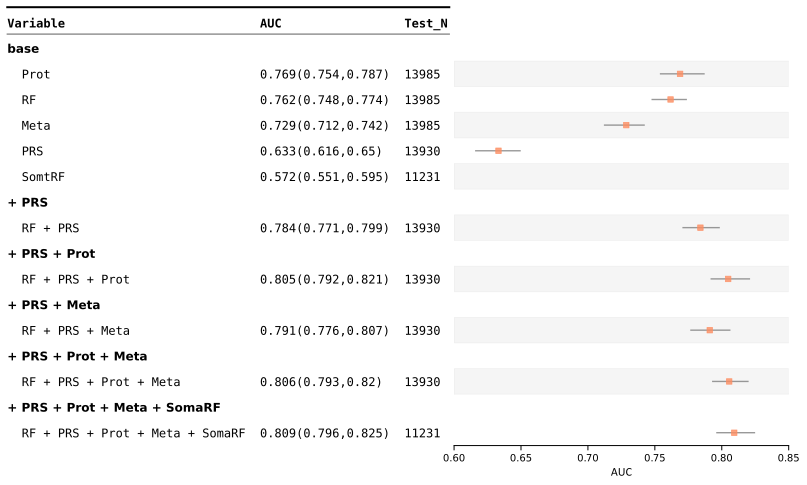

In [67]:
import forestplot as fp

plt_data = score_metrics_df.copy()
plt_data["Test_N_show"] = plt_data["N"].round(0).astype(str)
plt_data["AUC_show"] = (
    plt_data["AUC"].round(3).astype(str)
    + "("
    + plt_data["AUC_LCI"].round(3).astype(str)
    + ","
    + plt_data["AUC_UCI"].round(3).astype(str)
    + ")"
)
fig, ax = plt.subplots(figsize=(6, 8))
fp.forestplot(
    plt_data,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="method",
    ylabel="",
    xlabel="AUC",
    capitalize=True,
    table=True,
    sort=True,
    groupvar="group",
    group_order=group_order,
    annote=["AUC_show", "Test_N_show"],
    annoteheaders=["AUC", "Test_N"],
    color_alt_rows=True,
    xlim=(0.6, 0.85),
    ax=ax,
    bbox_to_anchor=(0.5, 0.95),
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        # "offset": 0.3,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": "1",  # gray color for x-reference line
        "markercolor": sns.palettes.color_palette("Set2", 4)[
            1
        ],  # black color for markers
    },
)
# save_fig(
#     fig,
#     path="results/Meta_Prot/figures/3_comapre/2_AUC_compapre_plot",
#     bbox_inches=None,
# )

In [15]:
compareGroupDict = {
    "base vs all omics": [group_order[0], group_order[-1]],
    "all methods": group_order,
}

## ROC

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


roc_list = []
for method in methods:
    tmp = score[[method, "incident_cad"]].copy().dropna()

    fpr, tpr, _ = roc_curve(tmp["incident_cad"], tmp[method])

    roc_current_df = pd.DataFrame(
        [
            {
                "method": method,
                # "auc": auc(fpr, tpr),
                "fpr": fpr_,
                "tpr": tpr_,
            }
            for fpr_, tpr_ in zip(fpr, tpr)
        ]
    )
    roc_current_df["auc"] = auc(fpr, tpr)
    roc_current_df["group"] = roc_current_df["method"].apply(split_method)
    roc_list.append(roc_current_df)
    # break

roc_df = pd.concat(roc_list).reset_index(drop=True)
roc_df

,method,fpr,tpr,auc,group
0,RF,0.000000,0.000000,0.761748,base
1,RF,0.000076,0.000000,0.761748,base
2,RF,0.000380,0.000000,0.761748,base
3,RF,0.000380,0.001221,0.761748,base
4,RF,0.000608,0.001221,0.761748,base
...,...,...,...,...,...
13960,RF + PRS + Prot + Meta + SomaRF,0.894334,0.996970,0.809319,+ PRS + Prot + Meta + SomaRF
13961,RF + PRS + Prot + Meta + SomaRF,0.894334,0.998485,0.809319,+ PRS + Prot + Meta + SomaRF
13962,RF + PRS + Prot + Meta + SomaRF,0.955917,0.998485,0.809319,+ PRS + Prot + Meta + SomaRF
13963,RF + PRS + Prot + Meta + SomaRF,0.955917,1.000000,0.809319,+ PRS + Prot + Meta + SomaRF


In [17]:
to_plot_group = compareGroupDict["base vs all omics"]
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(
    data=roc_df.query("group in @to_plot_group"),
    x="fpr",
    y="tpr",
    hue="method",
    lw=2,
    palette=sns.palettes.color_palette("Set2"),
    estimator=None,
    ax=ax,
)
save_fig(path="results/Meta_Prot/figures/3_comapre/3_1_ROC_plot")

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(
    data=roc_df,
    x="fpr",
    y="tpr",
    hue="method",
    lw=2,
    palette=sns.palettes.color_palette("Set2"),
    estimator=None,
    ax=ax,
)
save_fig(path="results/Meta_Prot/figures/3_comapre/3_2_ROC_all_plot")

## 特征相关图

In [19]:
to_extract_group = ["base"]
to_extract_method = (
    score_metrics_df.query("group in @to_extract_group")["method"].unique().tolist()
)
RF = [
    "age",
    "sex",
    "ldl_a",
    "hdl_a",
    "tc_a",
    "tg_a",
    "sbp_a",
    "BMI",
    "smoking",
    "prevalent_diabetes",
]
to_comapre_corr = ["future_cad_time_years", *RF, *to_extract_method]

to_comapre_corr

['future_cad_time_years',
 'age',
 'sex',
 'ldl_a',
 'hdl_a',
 'tc_a',
 'tg_a',
 'sbp_a',
 'BMI',
 'smoking',
 'prevalent_diabetes',
 'RF',
 'Prot',
 'Meta',
 'PRS',
 'SomtRF']

In [20]:
score

,eid,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,RF + PRS + Prot + Meta + SomaRF,height,weight,BSA,genotype_array,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,dbp_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension,future_cad_time_days,future_cad_time_months,future_cad_time_years,Ethnic,PCSK9_Carrier,APOB_Carrier,LDLR_Carrier,FH_Carrier,ASCVD,PCE,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes,RF:zscore,Prot:zscore,Meta:zscore,PRS:zscore,SomtRF:zscore,RF + PRS:zscore,RF + PRS + Prot:zscore,RF + PRS + Meta:zscore,RF + PRS + Prot + Meta:zscore,RF + PRS + Prot + Meta + SomaRF:zscore
0,1492817,0.079168,0.319107,0.111834,1.631688,0.056097,0.102969,0.135405,0.113446,0.137779,0.136508,183.0,84.0,2.066398,2.0,-9.21715,2.50132,6.53861,-12.286900,-8.62668,7.950510,-4.154700,15.349500,1.425060,-3.553490,8.0,2401.0,95.0,95.0,165.0,4.846,1.215,1.304,2.982,0.879,0.0,0.0,3.43,107.588388,72.7,0.0,NaT,1958-10-01,2008-10-04,NaT,NaN,NaN,50.043836,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5695 days 10:23:13.718356,190.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.099445,49.0,1.0,2.982,1.304000,4.846,1.215,165.0,25.0829,2.0,0.0,0.690485,1.303871,1.339186,0.798614,1.004922,0.964852,1.438519,1.283246,1.536367,1.595712
1,5882986,-0.094849,0.148448,-0.139695,1.211318,0.046768,0.039524,0.075449,0.026902,0.067061,0.067267,179.0,102.1,2.253140,2.0,-12.43100,4.34671,-3.44632,3.673030,7.79434,-1.088290,-0.491902,0.863462,0.438468,0.245743,3.0,2601.0,72.0,72.0,117.0,6.403,0.811,1.618,4.210,1.214,0.0,0.0,4.03,105.810438,59.1,0.0,NaT,1956-08-01,2008-04-17,NaT,NaN,NaN,51.745205,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5865 days 10:23:17.935989,196.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035562,51.0,0.0,4.210,1.618000,6.403,0.811,117.0,31.8654,2.0,0.0,-0.835289,0.711180,-2.697054,-0.750485,NaN,-1.075803,0.039956,-1.913127,-0.394666,NaN
2,4778091,-0.091549,0.004252,-0.082892,0.874289,0.036335,0.024379,0.040427,0.019704,0.037286,0.034919,173.0,70.6,1.841934,2.0,-12.08050,2.83367,-2.34520,-0.658979,3.15210,1.767420,-0.525408,0.940101,1.223780,1.258910,13.0,2500.0,80.0,80.0,128.0,4.884,1.514,NaN,2.680,0.786,0.0,0.0,0.77,99.182555,82.8,0.0,NaT,1959-01-01,2009-07-15,NaT,NaN,NaN,50.569863,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5411 days 10:23:17.050110,181.0,15.0,White,0.0,0.0,0.0,0.0,0.0,0.028352,50.0,1.0,2.680,1.447676,4.884,1.514,128.0,23.5892,0.0,0.0,0.258339,1.327268,-1.164894,1.125120,NaN,0.711252,1.432399,0.117753,1.130772,NaN
3,1815527,-0.132070,0.022466,-0.190256,0.792252,0.047294,0.010357,0.035493,-0.006719,0.025958,0.027146,168.0,75.3,1.874567,2.0,-12.91150,3.06833,-2.40977,0.319129,1.17864,-0.980264,2.854140,2.042630,-4.114240,1.496570,17.0,3364.0,82.0,82.0,139.0,5.986,1.107,NaN,3.085,0.915,0.0,0.0,0.89,84.520751,71.3,0.0,NaT,1948-11-01,2007-10-01,NaT,NaN,NaN,58.953425,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,6064 days 10:23:14.085937,203.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035299,58.0,0.0,3.085,1.447676,5.986,1.107,139.0,26.1500,0.0,0.0,0.198319,1.192707,-0.031214,1.781543,0.338989,0.935050,1.525803,0.812495,1.429743,1.475632
4,4712946,0.013174,-0.032008,-0.040549,1.166203,0.050331,0.064405,0.058194,0.057941,0.055474,0.054100,161.0,57.0,1.596611,2.0,-13.22750,4.87999,-1.51896,6.315530,19.39780,2.451040,-0.668802,-1.484790,-0.950794,-0.846437,15.0,3600.0,92.0,92.0,182.0,6.212,1.933,1.547,3.886,1.050,0.0,0.0,7.54,100.884100,57.1,0.0,NaT,1947-04-01,2007-12-22,NaT,NaN,NaN,60.767123,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5982 days 10:23:16.995790,200.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.070264,60.0,0.0,3.886,1.547000,6.212,1.933,182.0,21.9899,1.0,0.0,0.652410,0.757483,0.465586,1.557841,NaN,1.252133,1.263836,1.199956,1.241997,NaN
...,...,...,...,...,...,...

In [21]:
corr_df = score

In [22]:
corr_matrix = corr_df[to_comapre_corr].corr().loc[to_extract_method]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(
    corr_matrix.T,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    ax=ax,
    annot=True,
    fmt=".2f",
)
save_fig(path="results/Meta_Prot/figures/3_comapre/4_corr_plot")

## calibration

In [23]:
score

,eid,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,RF + PRS + Prot + Meta + SomaRF,height,weight,BSA,genotype_array,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,dbp_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension,future_cad_time_days,future_cad_time_months,future_cad_time_years,Ethnic,PCSK9_Carrier,APOB_Carrier,LDLR_Carrier,FH_Carrier,ASCVD,PCE,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes,RF:zscore,Prot:zscore,Meta:zscore,PRS:zscore,SomtRF:zscore,RF + PRS:zscore,RF + PRS + Prot:zscore,RF + PRS + Meta:zscore,RF + PRS + Prot + Meta:zscore,RF + PRS + Prot + Meta + SomaRF:zscore
0,1492817,0.079168,0.319107,0.111834,1.631688,0.056097,0.102969,0.135405,0.113446,0.137779,0.136508,183.0,84.0,2.066398,2.0,-9.21715,2.50132,6.53861,-12.286900,-8.62668,7.950510,-4.154700,15.349500,1.425060,-3.553490,8.0,2401.0,95.0,95.0,165.0,4.846,1.215,1.304,2.982,0.879,0.0,0.0,3.43,107.588388,72.7,0.0,NaT,1958-10-01,2008-10-04,NaT,NaN,NaN,50.043836,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5695 days 10:23:13.718356,190.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.099445,49.0,1.0,2.982,1.304000,4.846,1.215,165.0,25.0829,2.0,0.0,0.690485,1.303871,1.339186,0.798614,1.004922,0.964852,1.438519,1.283246,1.536367,1.595712
1,5882986,-0.094849,0.148448,-0.139695,1.211318,0.046768,0.039524,0.075449,0.026902,0.067061,0.067267,179.0,102.1,2.253140,2.0,-12.43100,4.34671,-3.44632,3.673030,7.79434,-1.088290,-0.491902,0.863462,0.438468,0.245743,3.0,2601.0,72.0,72.0,117.0,6.403,0.811,1.618,4.210,1.214,0.0,0.0,4.03,105.810438,59.1,0.0,NaT,1956-08-01,2008-04-17,NaT,NaN,NaN,51.745205,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5865 days 10:23:17.935989,196.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035562,51.0,0.0,4.210,1.618000,6.403,0.811,117.0,31.8654,2.0,0.0,-0.835289,0.711180,-2.697054,-0.750485,NaN,-1.075803,0.039956,-1.913127,-0.394666,NaN
2,4778091,-0.091549,0.004252,-0.082892,0.874289,0.036335,0.024379,0.040427,0.019704,0.037286,0.034919,173.0,70.6,1.841934,2.0,-12.08050,2.83367,-2.34520,-0.658979,3.15210,1.767420,-0.525408,0.940101,1.223780,1.258910,13.0,2500.0,80.0,80.0,128.0,4.884,1.514,NaN,2.680,0.786,0.0,0.0,0.77,99.182555,82.8,0.0,NaT,1959-01-01,2009-07-15,NaT,NaN,NaN,50.569863,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5411 days 10:23:17.050110,181.0,15.0,White,0.0,0.0,0.0,0.0,0.0,0.028352,50.0,1.0,2.680,1.447676,4.884,1.514,128.0,23.5892,0.0,0.0,0.258339,1.327268,-1.164894,1.125120,NaN,0.711252,1.432399,0.117753,1.130772,NaN
3,1815527,-0.132070,0.022466,-0.190256,0.792252,0.047294,0.010357,0.035493,-0.006719,0.025958,0.027146,168.0,75.3,1.874567,2.0,-12.91150,3.06833,-2.40977,0.319129,1.17864,-0.980264,2.854140,2.042630,-4.114240,1.496570,17.0,3364.0,82.0,82.0,139.0,5.986,1.107,NaN,3.085,0.915,0.0,0.0,0.89,84.520751,71.3,0.0,NaT,1948-11-01,2007-10-01,NaT,NaN,NaN,58.953425,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,6064 days 10:23:14.085937,203.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035299,58.0,0.0,3.085,1.447676,5.986,1.107,139.0,26.1500,0.0,0.0,0.198319,1.192707,-0.031214,1.781543,0.338989,0.935050,1.525803,0.812495,1.429743,1.475632
4,4712946,0.013174,-0.032008,-0.040549,1.166203,0.050331,0.064405,0.058194,0.057941,0.055474,0.054100,161.0,57.0,1.596611,2.0,-13.22750,4.87999,-1.51896,6.315530,19.39780,2.451040,-0.668802,-1.484790,-0.950794,-0.846437,15.0,3600.0,92.0,92.0,182.0,6.212,1.933,1.547,3.886,1.050,0.0,0.0,7.54,100.884100,57.1,0.0,NaT,1947-04-01,2007-12-22,NaT,NaN,NaN,60.767123,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5982 days 10:23:16.995790,200.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.070264,60.0,0.0,3.886,1.547000,6.212,1.933,182.0,21.9899,1.0,0.0,0.652410,0.757483,0.465586,1.557841,NaN,1.252133,1.263836,1.199956,1.241997,NaN
...,...,...,...,...,...,...

In [24]:
from sklearn.calibration import (
    CalibratedClassifierCV,
    CalibrationDisplay,
    calibration_curve,
)

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression


def calibration_score(raw_train_pred, raw_test_pred, train_y, method="isotonic"):
    if method == "isotonic":
        ir = IsotonicRegression(out_of_bounds="clip")
        ir.fit(raw_train_pred, train_y)

        pred_train_calibrated = ir.predict(raw_train_pred)
        pred_test_calibrated = ir.predict(raw_test_pred)
    elif method == "logitstic":
        lr = LogisticRegression(
            # class_weight="balanced",
            max_iter=5000,
            random_state=123,
        )
        raw_train_pred = (
            raw_train_pred.values
            if isinstance(raw_train_pred, pd.Series)
            else raw_train_pred
        )
        raw_test_pred = (
            raw_test_pred.values
            if isinstance(raw_test_pred, pd.Series)
            else raw_test_pred
        )
        lr.fit(raw_train_pred.reshape(-1, 1), train_y)
        pred_train_calibrated = lr.predict_proba(raw_train_pred.reshape(-1, 1))[:, 1]
        pred_test_calibrated = lr.predict_proba(raw_test_pred.reshape(-1, 1))[:, 1]
    else:
        raise ValueError("method should be isotonic or logitstic")

    return pred_train_calibrated, pred_test_calibrated


# method = "LR"
from scipy.stats import logistic

calibration_method = "isotonic"  # "logitstic" or "isotonic" or False


for method in methods:
    method = f"{method}:zscore"
    print(f"model: {method}, with {calibration_method} calibration")

    for_calibration_train_df = train_score[["eid", "incident_cad", method]].dropna()
    for_calibration_test_df = score[["eid", "incident_cad", method]].dropna()

    pred_train_calibrated, pred_test_calibrated = calibration_score(
        raw_train_pred=for_calibration_train_df[method],
        raw_test_pred=for_calibration_test_df[method],
        train_y=for_calibration_train_df["incident_cad"],
        method=calibration_method,
    )
    # score[f"{method}:calibrated"] = pred_test_calibrated
    if f"{method}:calibrated" in score.columns:
        score.drop(columns=[f"{method}:calibrated"], inplace=True)

    # train_score[f"{method}:calibrated"] = pred_train_calibrated
    # score[f"{method}:calibrated"] = pred_test_calibrated
    pred_res_df = pd.DataFrame(
        {
            "eid": for_calibration_test_df.eid.reset_index(drop=True),
            f"{method}:calibrated": pred_test_calibrated,
        }
    )

    score = score.merge(pred_res_df, on="eid", how="left")


calibrated_cols = [i for i in score.columns if "calibrated" in i]

model: RF:zscore, with isotonic calibration
model: Prot:zscore, with isotonic calibration
model: Meta:zscore, with isotonic calibration
model: PRS:zscore, with isotonic calibration
model: SomtRF:zscore, with isotonic calibration
model: RF + PRS:zscore, with isotonic calibration
model: RF + PRS + Prot:zscore, with isotonic calibration
model: RF + PRS + Meta:zscore, with isotonic calibration
model: RF + PRS + Prot + Meta:zscore, with isotonic calibration
model: RF + PRS + Prot + Meta + SomaRF:zscore, with isotonic calibration


In [25]:
from sklearn.calibration import (
    CalibratedClassifierCV,
    CalibrationDisplay,
    calibration_curve,
)

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression


def calibration_score(raw_train_pred, raw_test_pred, train_y, method="isotonic"):
    if method == "isotonic":
        ir = IsotonicRegression(out_of_bounds="clip")
        ir.fit(raw_train_pred, train_y)

        pred_train_calibrated = ir.predict(raw_train_pred)
        pred_test_calibrated = ir.predict(raw_test_pred)
    elif method == "logitstic":
        lr = LogisticRegression(
            # class_weight="balanced",
            max_iter=5000,
            random_state=123,
        )
        raw_train_pred = (
            raw_train_pred.values
            if isinstance(raw_train_pred, pd.Series)
            else raw_train_pred
        )
        raw_test_pred = (
            raw_test_pred.values
            if isinstance(raw_test_pred, pd.Series)
            else raw_test_pred
        )
        lr.fit(raw_train_pred.reshape(-1, 1), train_y)
        pred_train_calibrated = lr.predict_proba(raw_train_pred.reshape(-1, 1))[:, 1]
        pred_test_calibrated = lr.predict_proba(raw_test_pred.reshape(-1, 1))[:, 1]
    else:
        raise ValueError("method should be isotonic or logitstic")

    return pred_train_calibrated, pred_test_calibrated


# method = "LR"
from scipy.stats import logistic

calibration_method = "isotonic"  # "logitstic" or "isotonic" or False


for method in methods:
    method = f"{method}"
    print(f"model: {method}, with {calibration_method} calibration")

    for_calibration_train_df = train_score[["eid", "incident_cad", method]].dropna()
    for_calibration_test_df = score[["eid", "incident_cad", method]].dropna()

    pred_train_calibrated, pred_test_calibrated = calibration_score(
        raw_train_pred=for_calibration_train_df[method],
        raw_test_pred=for_calibration_test_df[method],
        train_y=for_calibration_train_df["incident_cad"],
        method=calibration_method,
    )
    # score[f"{method}:calibrated"] = pred_test_calibrated
    if f"{method}:calibrated" in score.columns:
        score.drop(columns=[f"{method}:calibrated"], inplace=True)

    # train_score[f"{method}:calibrated"] = pred_train_calibrated
    # score[f"{method}:calibrated"] = pred_test_calibrated
    pred_res_df = pd.DataFrame(
        {
            "eid": for_calibration_test_df.eid.reset_index(drop=True),
            f"{method}:calibrated": pred_test_calibrated,
        }
    )

    score = score.merge(pred_res_df, on="eid", how="left")


calibrated_cols = [i for i in score.columns if "calibrated" in i]

model: RF, with isotonic calibration
model: Prot, with isotonic calibration
model: Meta, with isotonic calibration
model: PRS, with isotonic calibration
model: SomtRF, with isotonic calibration
model: RF + PRS, with isotonic calibration
model: RF + PRS + Prot, with isotonic calibration
model: RF + PRS + Meta, with isotonic calibration
model: RF + PRS + Prot + Meta, with isotonic calibration
model: RF + PRS + Prot + Meta + SomaRF, with isotonic calibration


In [26]:
def plot_calibration_score(
    data,
    fraction_of_positives="fraction_of_positives",
    mean_predicted_value="mean_predicted_value",
    ax=None,
    hue=None,
    **kwargs,
):
    if ax is None:
        fig, ax = plt.subplots()
    up_bd = max([max(data[fraction_of_positives]), max(data[mean_predicted_value])])

    sns.lineplot(
        data=data,
        x=mean_predicted_value,
        y=fraction_of_positives,
        ax=ax,
        hue=hue,
        **kwargs,
    )

    ax.set(
        title="Calibration plot",
        xlabel="Mean predicted value",
        ylabel="Fraction of positives",
    )

    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    ax.set_xlim(0, up_bd)
    ax.set_ylim(0, up_bd)
    ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center")
    return ax

In [28]:
n_bins = 10
strategy = "quantile"
pos_label = 1

res_list = []
for method in methods:
    to_cal = score[
        ["eid", "incident_cad", f"{method}", f"{method}:calibrated"]
    ].dropna()
    y_true = to_cal["incident_cad"]
    y_prob = to_cal[f"{method}:calibrated"]

    pos_label_validated, name = CalibrationDisplay._validate_from_predictions_params(
        y_true, y_prob, sample_weight=None, pos_label=pos_label
    )

    prob_true, prob_pred = calibration_curve(
        y_true, y_prob, n_bins=n_bins, strategy=strategy, pos_label=pos_label
    )
    res = pd.DataFrame({"prob_true": prob_true, "prob_pred": prob_pred, "name": method})
    res_list.append(res)
calibration_df = pd.concat(res_list)

calibration_df["group"] = calibration_df["name"].apply(split_method)


fig, ax = plt.subplots(1, 1, figsize=(8, 7))


# for i, group in enumerate():
# ax = axes[i]
need_group = compareGroupDict["base vs all omics"]

plot_calibration_score(
    calibration_df.query("group in @need_group"),
    fraction_of_positives="prob_true",
    mean_predicted_value="prob_pred",
    hue="name",
    palette="Dark2",
    lw=2,
    ax=ax,
    **{"marker": "s", "linestyle": "-"},
    # style="group",
)
ax.legend(loc="upper left")
save_fig(path="results/Meta_Prot/figures/3_comapre/5_calibration_plot")

## net benifit

In [29]:
net_benifit_group_need = compareGroupDict["base vs all omics"]

y1 = "Prot:calibrated"
y2 = f"{methods[-1]}:calibrated"

In [30]:
from ppp_prediction.net_benifit import plot_graphs
from dcurves import dca
import numpy as np


dca_famhistory_df = dca(
    data=score.dropna(subset=["incident_cad"]),
    outcome="incident_cad",
    modelnames=[
        f"{i}:calibrated"
        for i in calibration_df.query("group in @net_benifit_group_need")["name"]
        .unique()
        .tolist()
    ],
    # prevalence=0.05,
    thresholds=np.arange(0, 0.75, 0.01),
)
# dca_famhistory_df
fig, ax = plt.subplots(figsize=(5, 5))
plot_graphs(
    plot_df=dca_famhistory_df,
    graph_type="net_benefit",
    y_limits=[0, 0.06],
    ax=ax,
    line_kwargs={"lw": 2},
    show_grid=False,
    color_names="nejm",
    smooth_frac=0,
)
ax.set_title("Net Benefit")

thresholds = [i.get_data()[0] for i in ax.lines if i.get_label() == y1][0]
y1 = [i.get_data()[1] for i in ax.lines if i.get_label() == y1][0]
y2 = [i.get_data()[1] for i in ax.lines if i.get_label() == y2][0]

ax.fill_between(thresholds, y1, y2, color="red", alpha=0.15)
ax.legend(prop={"size": 10})

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Threshold probability (%)")
ax.set_ylabel("Net benefit (%)")
save_fig(path="results/Meta_Prot/figures/3_comapre/6_dca_plot")

# to_plot_region = dca_famhistory_df[dca_famhistory_df["net_benefit"] > 0]

# to_plot_region

## risk strat(百分比图)

In [31]:
risk_strat_group_need = compareGroupDict["base vs all omics"]

In [32]:
# from ppp_prediction.viz import calibration_dot_plot
import statsmodels.api as sm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy.stats import bootstrap


def calibration_curve_df(data=None, y_true=None, y_pred=None, k=10, n_resample=1000):
    if data is not None:
        y_true = data[y_true]
        y_pred = data[y_pred]
    elif isinstance(y_true, pd.Series) and isinstance(y_pred, pd.Series):
        pass
    elif isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray):
        y_true = pd.Series(y_true)
        y_pred = pd.Series(y_pred)
    elif isinstance(y_true, list) and isinstance(y_pred, list):
        y_true = pd.Series(y_true)
        y_pred = pd.Series(y_pred)
    else:
        raise ValueError(
            "data should be a DataFrame or y_true and y_pred should be Series or list or numpy array"
        )

    plt_df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred}).dropna()
    try:
        plt_df["y_pred_bins"] = pd.qcut(
            plt_df["y_pred"],
            k,
            labels=[f"{i:.0f}%" for i in (np.linspace(0, 1, k + 1) * 100)[1:]],
        )
    except ValueError:
        raise ValueError("input data have many values are same and cannot be binned")
    if not n_resample:
        plt_df_group = (
            plt_df.groupby("y_pred_bins")
            .apply(lambda x: pd.Series({"mean_true": x.y_true.mean()}))
            .reset_index(drop=False)
        )
    else:

        # 定义一个函数来计算均值
        def mean_bootstrap(data):
            # 使用bootstrap计算均值的置信区间
            res = bootstrap(data=(data,), statistic=np.mean, n_resamples=n_resample)

            return (
                np.mean(data),
                res.confidence_interval.low,
                res.confidence_interval.high,
            )

        # 对每个分位数进行bootstrap抽样

        plt_df_group = (
            plt_df.groupby("y_pred_bins")
            .apply(
                lambda x: pd.Series(
                    list(mean_bootstrap(x["y_true"])) + [x["y_pred"].mean()],
                    index=["mean_true", "ci_low", "ci_high", "mean_pred"],
                ).T
            )
            .reset_index(drop=False)
        )

    return plt_df_group


def _calibration_curve_plot(
    y_true, y_pred, k=10, n_resample=1000, offset=0, color="black", ax=None, label=None
):
    plt_df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred}).dropna()

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    _plt_data = calibration_curve_df(
        data=plt_df, y_true="y_true", y_pred="y_pred", k=k, n_resample=n_resample
    )

    x = np.arange(len(_plt_data["y_pred_bins"])) + offset

    if n_resample:
        ax.errorbar(
            x=x,
            y=_plt_data["mean_true"],
            yerr=[
                _plt_data["mean_true"] - _plt_data["ci_low"],
                _plt_data["ci_high"] - _plt_data["mean_true"],
            ],
            fmt="o",
            marker="o",
            mfc=color,
            color=color,
            capsize=4,
            label=label,
        )
    else:
        ax.scatter(
            x=x,
            y=_plt_data["mean_true"],
            color=color,
            marker="o",
            label=label,
        )
    # y_lowess = sm.nonparametric.lowess(_plt_data["mean_true"], x, frac=0.5)
    # ax.plot(y_lowess[:, 0], y_lowess[:, 1], color=color, linestyle="--")
    # sns.lineplot

    ax.set_xticks(np.arange(len(_plt_data["y_pred_bins"])))
    ax.set_xticklabels(_plt_data["y_pred_bins"])
    return ax


def calibration_dot_plot(
    y_true,
    y_pred,
    data,
    hue=None,
    hue_order=None,
    ax=None,
    color=None,
    k=10,
    n_resample=1000,
    offset=0.2,
):

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    if hue:
        hue_order = hue_order if hue_order is not None else data[hue].unique()
        offset_list = np.linspace(-offset, offset, len(hue_order))
        for idx in range(len(hue_order)):

            current_data = data[data[hue] == hue_order[idx]].dropna()
            color = (
                color
                if color is not None
                else sns.palettes.color_palette("Set1", len(hue_order))
            )
            _calibration_curve_plot(
                current_data[y_true],
                current_data[y_pred],
                k=k,
                n_resample=n_resample,
                offset=offset_list[idx],
                color=color[idx] if hasattr(color, "__iter__") else color,
                ax=ax,
                label=hue_order[idx],
            )

    else:
        _calibration_curve_plot(
            data[y_true],
            data[y_pred],
            k=k,
            n_resample=n_resample,
            offset=0,
            color=color,
            ax=ax,
            label=y_pred,
        )

    ax.legend(loc="upper left")

    ax.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Risk Score Decile", fontsize=12)
    ax.set_ylabel("Observed Event Rate", fontsize=12)
    return ax

<Axes: xlabel='y_pred_bins', ylabel='mean_true'>

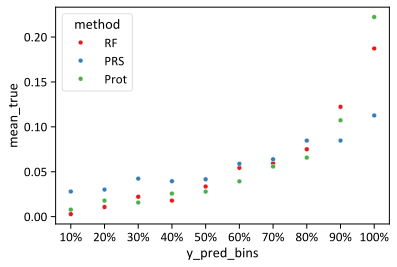

In [31]:
usedmethodlist = ["RF", "PRS", "Prot"]

calibration_data = pd.concat(
    [
        calibration_curve_df(
            data=score, y_true="incident_cad", y_pred=method, k=10, n_resample=10
        ).assign(method=method)
        for method in usedmethodlist
    ]
)
sns.scatterplot(
    data=calibration_data,
    x="y_pred_bins",
    y="mean_true",
    hue="method",
    palette="Set1",
)

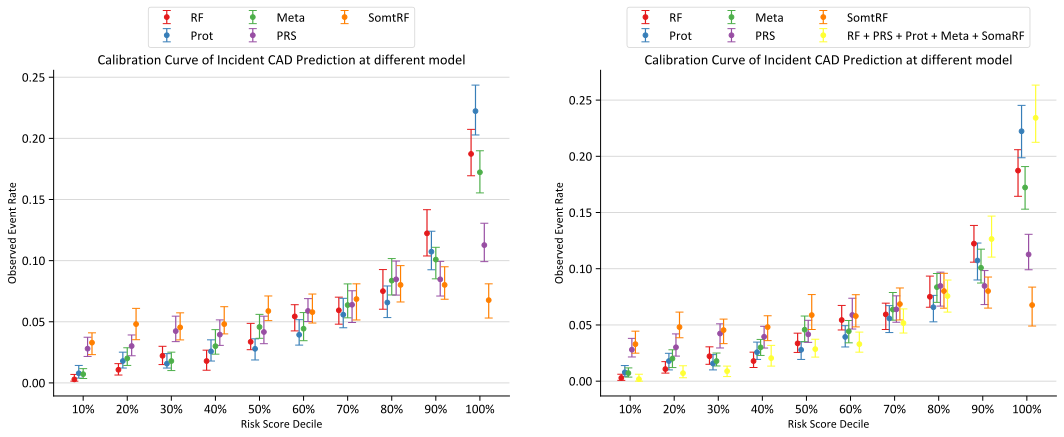

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
k = 10
n_resample = 100
## fig1
plt_group = ["base"]
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()
palletes = sns.color_palette("Set1", n_colors=len(method_list))
tgt = "incident_cad"

plt_data = score[[tgt] + [f"{i}" for i in method_list]].melt(
    value_vars=[f"{i}" for i in method_list],
    id_vars=[tgt],
    value_name="score",
    var_name="method",
)

calibration_dot_plot(
    data=plt_data,
    y_true=tgt,
    y_pred="score",
    hue="method",
    ax=ax1,
    color=palletes,
    k=k,
    n_resample=n_resample,
)
ax1.set_title(f"Calibration Curve of {tgt} Prediction with different model")


ax1.legend(loc="upper left")
# ax.legend(tgt_list)
# ax.grid(color="r", linestyle="--", linewidth=1, alpha=0.3)
ax1.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xlabel("Risk Score Decile", fontsize=12)
ax1.set_ylabel("Observed Event Rate", fontsize=12)
ax1.set_title(f"Calibration Curve of Incident CAD Prediction at different model")

## fig2
plt_group = risk_strat_group_need
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()
palletes = sns.color_palette("Set1", n_colors=len(method_list))

tgt = "incident_cad"


plt_data = score[[tgt] + [f"{i}" for i in method_list]].melt(
    value_vars=[f"{i}" for i in method_list],
    id_vars=[tgt],
    value_name="score",
    var_name="method",
)

calibration_dot_plot(
    data=plt_data,
    y_true=tgt,
    y_pred="score",
    hue="method",
    ax=ax2,
    color=palletes,
    k=k,
    n_resample=n_resample,
)
ax2.set_title(f"Calibration Curve of {tgt} Prediction with different model")


ax2.legend(loc="upper left")
# ax.legend(tgt_list)
# ax.grid(color="r", linestyle="--", linewidth=1, alpha=0.3)
ax2.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xlabel("Risk Score Decile", fontsize=12)
ax2.set_ylabel("Observed Event Rate", fontsize=12)
ax2.set_title(f"Calibration Curve of Incident CAD Prediction at different model")


ax1.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)
ax2.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)

# save_fig(path="results/Meta_Prot/figures/3_comapre/7_1_risk_start_method_compare")
# ax2.legend("", frameon=False)
# ax1.legend("", frameon=False)

In [73]:
score["death"] = (
    (~score["death_date"].isna()) & (score["death_date"] > score["recuit_date"])
).astype(int)

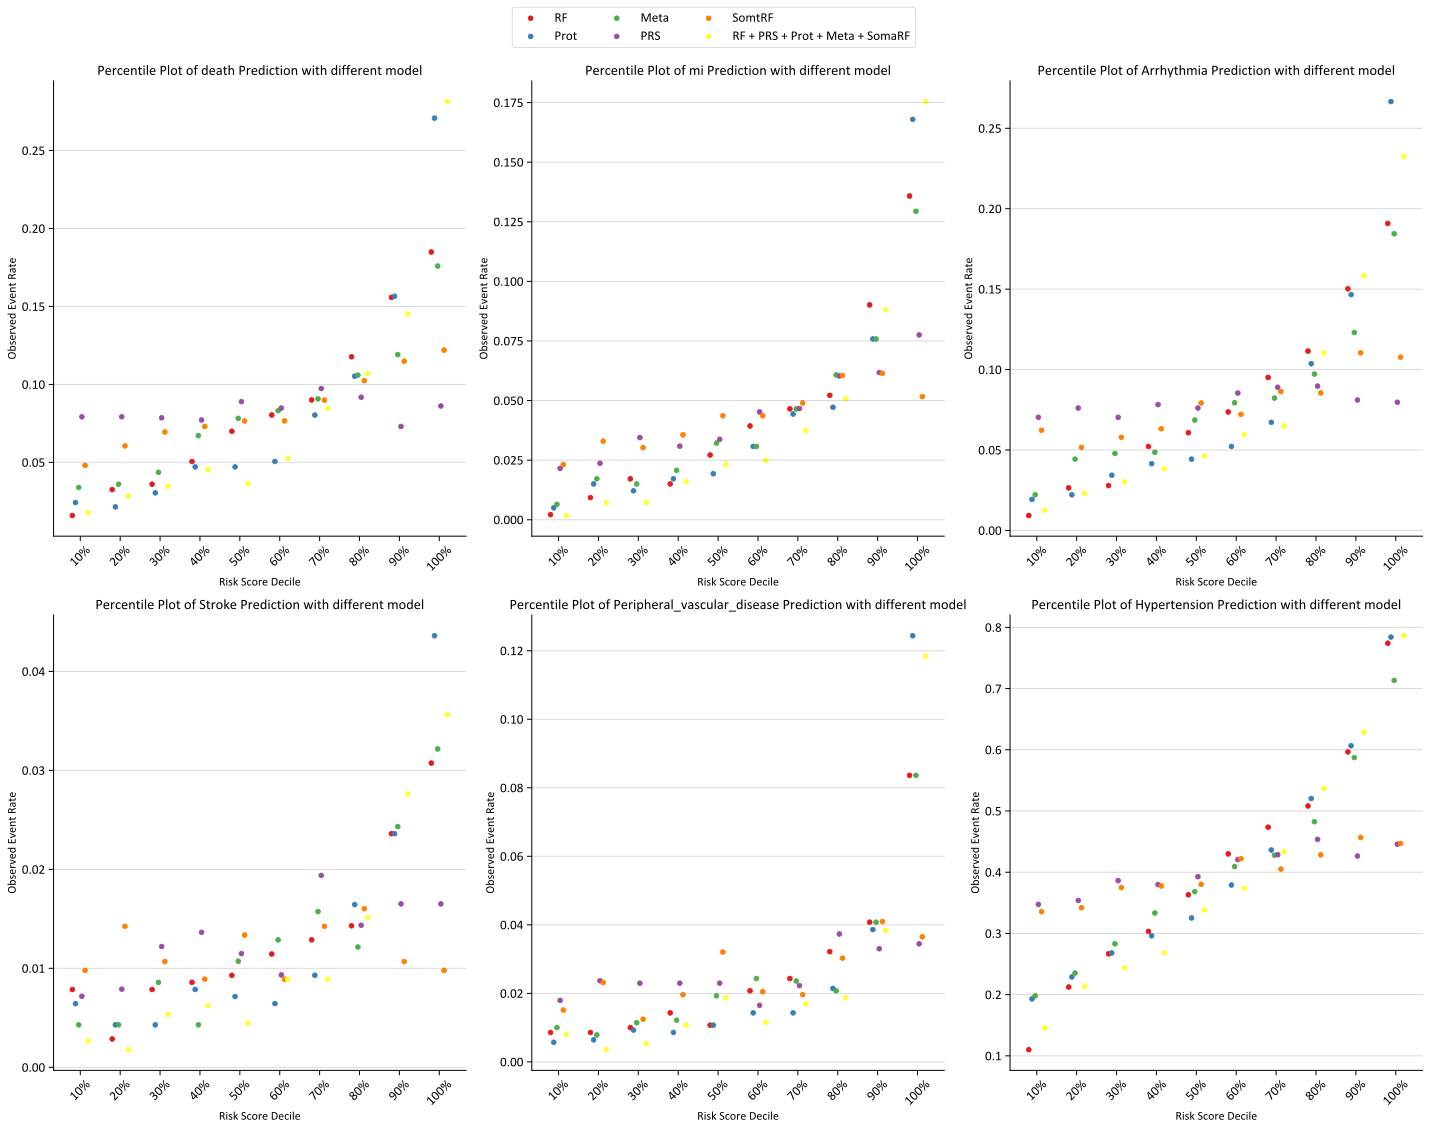

In [81]:
tgt_list = [
    "death",
    "mi",
    "Arrhythmia",
    "Stroke",
    "Peripheral_vascular_disease",
    "Hypertension",
]

n_resample = None
# method_list = ["RF", "PRS"] + calibration_df.query("group == '+ RF + PRS'")[
#     "name"
# ].unique().tolist()
plt_group = risk_strat_group_need
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()
for idx in range(len(tgt_list)):
    ax1, tgt = axes[idx], tgt_list[idx]
    plt_data = score[[tgt] + [f"{i}" for i in method_list]].melt(
        value_vars=[f"{i}" for i in method_list],
        id_vars=[tgt],
        value_name="score",
        var_name="method",
    )

    calibration_dot_plot(
        data=plt_data,
        y_true=tgt,
        y_pred="score",
        hue="method",
        ax=ax1,
        k=10,
        n_resample=n_resample,
    )
    ax1.set_title(f"Percentile Plot of {tgt} Prediction with different model")

    plt.setp(ax1.get_xticklabels(), rotation=45)
    if idx == 0:
        fig.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=3)
    ax1.legend("", frameon=False)

fig.tight_layout()

# save_fig(
#     path="results/Meta_Prot/figures/3_comapre/7_2_risk_start_diffent_event_compare_no_ci",
#     bbox_inches="tight",
# )

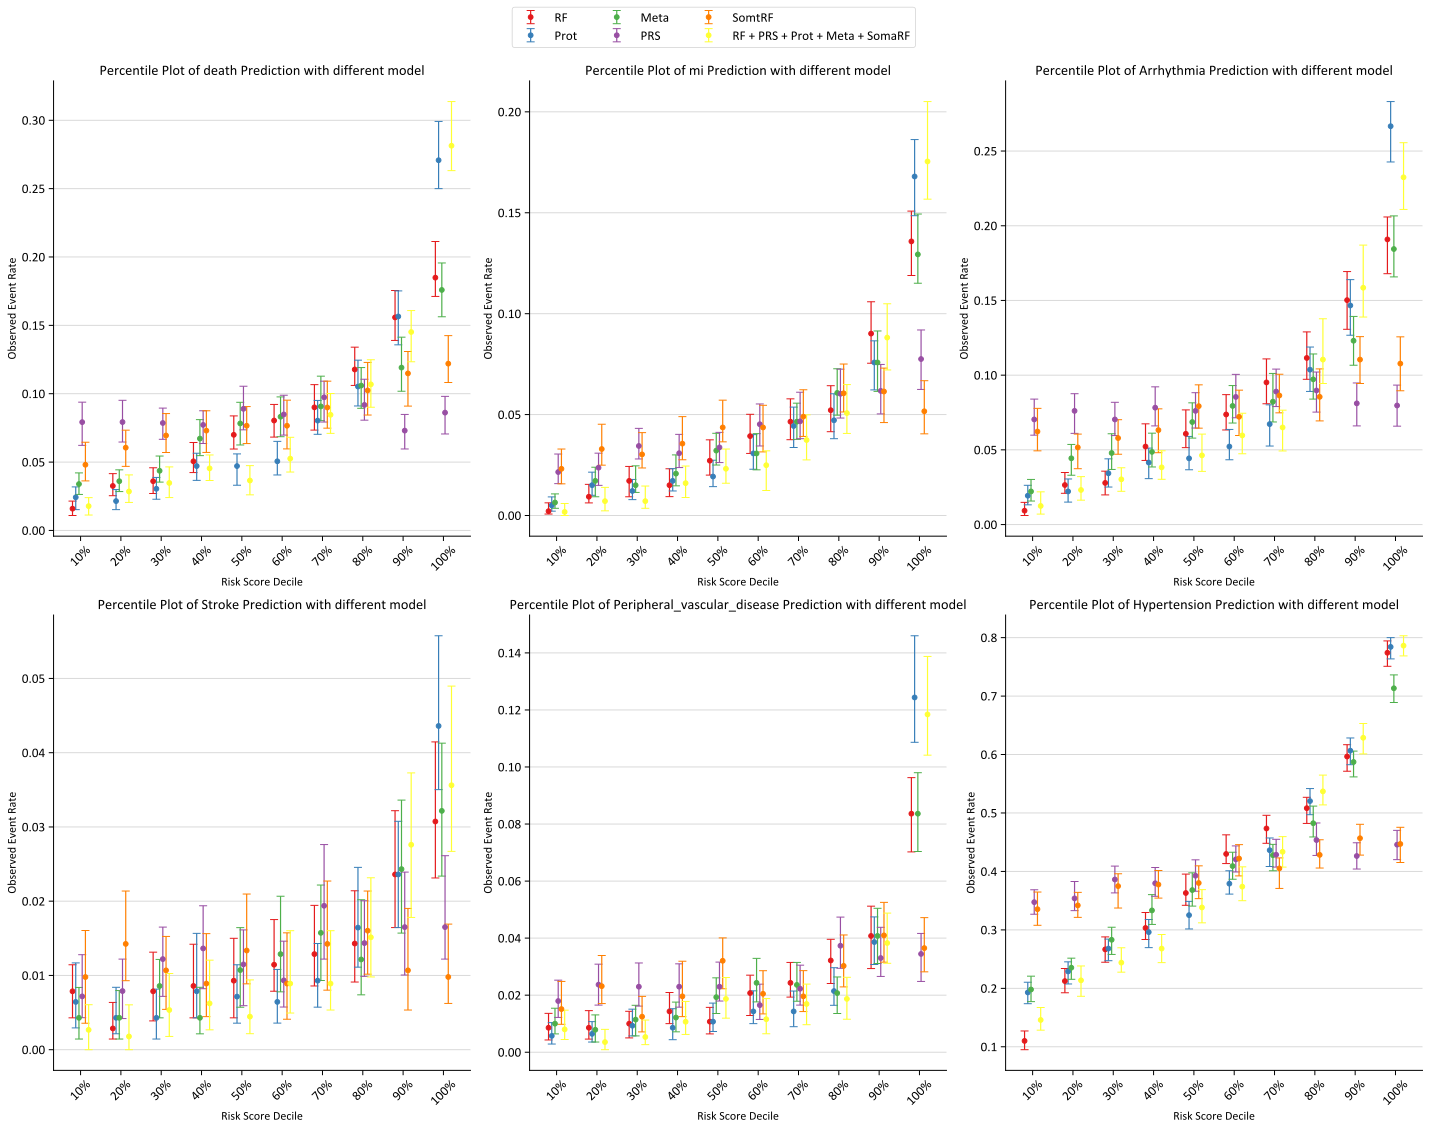

In [82]:
tgt_list = [
    "death",
    "mi",
    "Arrhythmia",
    "Stroke",
    "Peripheral_vascular_disease",
    "Hypertension",
]

n_resample = 100
# method_list = ["RF", "PRS"] + calibration_df.query("group == '+ RF + PRS'")[
#     "name"
# ].unique().tolist()
plt_group = risk_strat_group_need
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()
for idx in range(len(tgt_list)):
    ax1, tgt = axes[idx], tgt_list[idx]
    plt_data = score[[tgt] + [f"{i}" for i in method_list]].melt(
        value_vars=[f"{i}" for i in method_list],
        id_vars=[tgt],
        value_name="score",
        var_name="method",
    )

    calibration_dot_plot(
        data=plt_data,
        y_true=tgt,
        y_pred="score",
        hue="method",
        ax=ax1,
        k=10,
        n_resample=n_resample,
    )
    ax1.set_title(f"Percentile Plot of {tgt} Prediction with different model")

    plt.setp(ax1.get_xticklabels(), rotation=45)
    if idx == 0:
        fig.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=3)
    ax1.legend("", frameon=False)
fig.tight_layout()
# save_fig(
#     path="results/Meta_Prot/figures/3_comapre/7_2_risk_start_diffent_event_compare_ci",
#     bbox_inches="tight",
# )

In [35]:
# plt_data.groupby("method").apply(lambda x: x.dropna()["death"].value_counts())

## 生存分析

### KM Plot

In [42]:
def add_k_year_follow(
    df, k=5, unit="month", follow_year_col="year_of_cad_after_recuit"
):

    assert unit in ["month", "year", "day"]

    E = f"{k}_years_cad"
    T = f"{k}_years_cad_{unit}"

    df[E] = (df[follow_year_col] <= k).astype(int)

    def survive_time(x):
        cad_date = x["cad_date"]
        death_date = x["death_date"]
        recuit_date = x["recuit_date"]

        if x[E] == 1:  # K年内得了冠心病
            days = (cad_date - recuit_date).days
        elif x[E] == 0:  # K年没有冠心病
            if pd.notnull(death_date):
                death_times_after_recuit = (death_date - recuit_date).days
                if death_times_after_recuit <= k * 365:  # K年内死亡了
                    days = death_times_after_recuit
                else:
                    days = k * 365  # 死亡了，但是没在k年内
            else:
                days = k * 365  # 直到隨訪結束也沒有死
        if unit == "month":
            return days / 30
        elif unit == "year":
            return days / 365
        else:
            return days

    df[T] = df.apply(survive_time, axis=1)
    return df, E, T


score["age_bin"] = pd.cut(
    score["age"],
    bins=[0, 60, 65, 70],
    labels=["0-60", "60-65", "65-70"],
)

# show age bin dist
score.groupby(["age_bin"]).value_counts(["incident_cad"])

score, E_3, T_3 = add_k_year_follow(score, k=3)
score, E_5, T_5 = add_k_year_follow(score, k=5)
score, E_10, T_10 = add_k_year_follow(score, k=10)

In [43]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols
from lifelines import KaplanMeierFitter


def plot_KM_QT_k_percentile(plt_data, var, E, T, k=2, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    plt_data = plt_data[[var, E, T]].copy()
    plt_data[var].rank(pct=True, ascending=True)
    plt_data[f"{var}_bin"] = pd.cut(
        plt_data[var].rank(pct=True, ascending=True), bins=k
    )
    texts = ""
    for name, grouped_df in plt_data.groupby(f"{var}_bin"):
        kmf = KaplanMeierFitter()
        kmf.fit(grouped_df[T], event_observed=grouped_df[E], label=name)

        kmf.plot_cumulative_density(ax=ax)
        texts += f"{name} have {E} {grouped_df[grouped_df[E] == 1].shape[0]}\n"

    ax.set_title(f"{var} vs {T} and {E} at each bin", fontsize=8)
    ax.legend(title=f"{var}_percentile", fontsize=8)

    ax.text(
        0.99,
        0.99,
        texts,
        fontsize=12,
        ha="right",
        va="top",
        transform=ax.transAxes,
        multialignment="left",
    )
    return ax


def plot_KM_percentile(plt_data, var, E, T, ax=None, palette=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    if palette is None:
        palette = sns.palettes.color_palette("Set1", n_colors=3)
    else:
        if isinstance(palette, str):
            palette = sns.palettes.color_palette(palette, n_colors=3)
        elif not hasattr(palette, "__iter__"):
            raise ValueError("palette should be a iterable or string")
    k = 10
    plt_data = plt_data[[var, E, T]].copy()
    plt_data[var].rank(pct=True, ascending=True)
    plt_data[f"{var}_bin"] = pd.cut(
        plt_data[var].rank(pct=True, ascending=True), bins=k, ordered=True
    )
    texts = ""
    bins = plt_data[f"{var}_bin"].cat.categories

    to_plot_bin = [bins[0], bins[5], bins[-1]]
    to_plot_bin_name = ["Bottom 10%", "Middle 10%", "Top 10%"]

    for idx, name in enumerate(to_plot_bin):
        # print(f"{var}_bin == @name")

        # grouped_df = plt_data.query(f"{var}_bin == @name")
        grouped_df = plt_data[plt_data[f"{var}_bin"] == name]
        # print(grouped_df)
        kmf = KaplanMeierFitter()
        kmf.fit(
            grouped_df[T], event_observed=grouped_df[E], label=to_plot_bin_name[idx]
        )

        kmf.plot_cumulative_density(ax=ax, color=palette[idx], **kwargs)
        texts += f"{to_plot_bin_name[idx]} have {E} {grouped_df[grouped_df[E] == 1].shape[0]}\n"

    ax.set_title(f"{var} vs {T} and {E} at each bin", fontsize=8)
    ax.legend(title=f"{var}_percentile", fontsize=8)

    # ax.text(
    #     0.99,
    #     0.99,
    #     texts,
    #     fontsize=12,
    #     ha="right",
    #     va="top",
    #     transform=ax.transAxes,
    #     multialignment="left",
    # )
    return ax

In [44]:
E = "incident_cad"
T = "future_cad_time_months"
# method_list = ["ProtLassoRS", "PRS", "RF"]
plt_group = risk_strat_group_need
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()

age_bin_list = ["0-60", "60-65", "65-70", "ALL"]
nrow = len(method_list)
ncol = len(age_bin_list)

fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 3), sharex=True)
# axes = axes.flatten()
for row_idx, method in enumerate(method_list):
    for col_idx, age_bin in enumerate(age_bin_list):
        if age_bin == "ALL":
            tmp_df = score
        else:
            tmp_df = score.query("age_bin == @age_bin")

        tmp_df = tmp_df[["eid", E, T, method]].copy().dropna()
        ax = axes[row_idx, col_idx]
        plot_KM_percentile(
            tmp_df,
            method,
            E,
            T,
            ax=ax,
            palette=["#90ccf4", "#f3d250", "#f78888"],
            lw=5,
            ci_show=False,
        )
        ax.legend("", frameon=False)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_title(f"{method} at {age_bin}", fontsize=8)
        if row_idx == 0 and col_idx == 0:
            # ax.set_title(f"{method} at {age_bin}")
            fig.legend(
                title="Age Bin", loc="upper center", bbox_to_anchor=(0.5, 0.05), ncol=4
            )

save_fig(path="results/Meta_Prot/figures/3_comapre/8_1_KM_age_bin_compare")

### Normd to See HR

In [45]:
from lifelines import CoxPHFitter


def run_cox(df, var, E, T, cov=None):
    if cov is None:
        cov = []

    if isinstance(var, str):
        var = [var]
    if isinstance(cov, str):
        cov = [cov]
    cph = CoxPHFitter()
    tmp_df = df[var + [E, T] + cov].dropna().copy().reset_index(drop=True)

    # try:
    cph.fit(tmp_df, duration_col=T, event_col=E)
    summary_df = cph.summary
    summary_df["n_control"] = (tmp_df[E] == 0).sum()
    summary_df["n_case"] = (tmp_df[E] == 1).sum()
    summary_df["c_index"] = cph.concordance_index_

    res_df = (
        summary_df.loc[[var[0]]]
        .reset_index(drop=False)
        .rename(
            columns={
                "exp(coef) lower 95%": "HR_LCI",
                "exp(coef)": "HR",
                "exp(coef) upper 95%": "HR_UCI",
            }
        )
    )
    res_df["HR (95% CI)"] = res_df.apply(
        lambda x: f"{x['HR']:.2f} ({x['HR_LCI']:.2f}-{x['HR_UCI']:.2f})", axis=1
    )
    return res_df


def run_cox_complex(
    df,
    var,
    E,
    T,
    cov=None,
    subgroup_cols=None,
):
    """
    this result a df format for R forestploter
    like:
    ALL
    Age
    >60
    <60
    Sex   Nan
    female 1..
    male

    """
    df_list = []
    # cal ALL
    df_list.append(
        run_cox(
            df,
            var=var,
            E=E,
            T=T,
            cov=cov,
        ).assign(Subgroup="ALL")
    )
    # cal for each group
    for subgroup in subgroup_cols:
        df_list.append(pd.DataFrame({"Subgroup": [subgroup]}))
        for subgroup_name, subgroup_df in df.groupby(subgroup):
            df_list.append(
                run_cox(
                    subgroup_df,
                    var=var,
                    E=E,
                    T=T,
                    cov=cov,
                ).assign(Subgroup=subgroup_name)
            )
    return_df = pd.concat(df_list)

    return_df.insert(0, "Subgroup", return_df.pop("Subgroup"))

    return return_df

    # except:
    #     print(f"Error in {var}")
    #     return pd.DataFrame()


from itertools import product
from pandas import DataFrame
from typing import Union, Dict, List


def run_cox_complex_to_forestplot(
    df: DataFrame,
    hueDict: Union[List, Dict],  # hue at same plot, {"name1": "var1", "name2": "var2"}
    survDict: Union[
        List, Dict
    ],  # {"group1":{"E":E, "T":T}, ..} , diff group will plot at diff plot
    subgroup_cols: List,  # ['age', 'sex'] should be cat and ordered
):
    res = []
    if isinstance(hueDict, list):
        hueDict = {i: i for i in hueDict}
    if isinstance(survDict, list):
        survDict = {i: i for i in survDict}

    for (survName, currentSurvDict), (varName, var) in product(
        list(survDict.items()), hueDict.items()
    ):
        tmp_res = run_cox_complex(
            df,
            var,
            **currentSurvDict,
            subgroup_cols=subgroup_cols,
        )[
            [
                "Subgroup",
                "HR (95% CI)",
                "HR",
                "HR_UCI",
                "HR_LCI",
                # "p",
                "n_case",
                "n_control",
                "c_index",
            ]
        ]
        tmp_res.set_index("Subgroup", inplace=True)
        tmp_res.columns = [f"{i} {varName} {survName}" for i in tmp_res.columns]
        res.append(tmp_res)
    res_df = pd.concat(res, axis=1).reset_index(drop=False)

    return res_df
    # return res

In [46]:
methods

['RF',
 'Prot',
 'Meta',
 'PRS',
 'SomtRF',
 'RF + PRS',
 'RF + PRS + Prot',
 'RF + PRS + Meta',
 'RF + PRS + Prot + Meta',
 'RF + PRS + Prot + Meta + SomaRF']

In [47]:
score

,eid,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,RF + PRS + Prot + Meta + SomaRF,height,weight,BSA,genotype_array,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,dbp_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension,future_cad_time_days,future_cad_time_months,future_cad_time_years,Ethnic,PCSK9_Carrier,APOB_Carrier,LDLR_Carrier,FH_Carrier,ASCVD,PCE,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes,RF:zscore,Prot:zscore,Meta:zscore,PRS:zscore,SomtRF:zscore,RF + PRS:zscore,RF + PRS + Prot:zscore,RF + PRS + Meta:zscore,RF + PRS + Prot + Meta:zscore,RF + PRS + Prot + Meta + SomaRF:zscore,RF:zscore:calibrated,Prot:zscore:calibrated,Meta:zscore:calibrated,PRS:zscore:calibrated,SomtRF:zscore:calibrated,RF + PRS:zscore:calibrated,RF + PRS + Prot:zscore:calibrated,RF + PRS + Meta:zscore:calibrated,RF + PRS + Prot + Meta:zscore:calibrated,RF + PRS + Prot + Meta + SomaRF:zscore:calibrated,RF:calibrated,Prot:calibrated,Meta:calibrated,PRS:calibrated,SomtRF:calibrated,RF + PRS:calibrated,RF + PRS + Prot:calibrated,RF + PRS + Meta:calibrated,RF + PRS + Prot + Meta:calibrated,RF + PRS + Prot + Meta + SomaRF:calibrated,death,age_bin,3_years_cad,3_years_cad_month,5_years_cad,5_years_cad_month,10_years_cad,10_years_cad_month
0,1492817,0.079168,0.319107,0.111834,1.631688,0.056097,0.102969,0.135405,0.113446,0.137779,0.136508,183.0,84.0,2.066398,2.0,-9.21715,2.50132,6.53861,-12.286900,-8.62668,7.950510,-4.154700,15.349500,1.425060,-3.553490,8.0,2401.0,95.0,95.0,165.0,4.846,1.215,1.304,2.982,0.879,0.0,0.0,3.43,107.588388,72.7,0.0,NaT,1958-10-01,2008-10-04,NaT,NaN,NaN,50.043836,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5695 days 10:23:13.718356,190.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.099445,49.0,1.0,2.982,1.304000,4.846,1.215,165.0,25.0829,2.0,0.0,0.690485,1.303871,1.339186,0.798614,1.004922,0.964852,1.438519,1.283246,1.536367,1.595712,0.052545,0.052545,0.052545,0.052556,0.051385,0.052556,0.052556,0.052556,0.052556,0.051385,0.063625,0.106383,0.071795,0.084577,0.058721,0.112977,0.142857,0.136955,0.151697,0.147783,0,0-60,0,36.5,0,60.833333,0,121.666667
1,5882986,-0.094849,0.148448,-0.139695,1.211318,0.046768,0.039524,0.075449,0.026902,0.067061,0.067267,179.0,102.1,2.253140,2.0,-12.43100,4.34671,-3.44632,3.673030,7.79434,-1.088290,-0.491902,0.863462,0.438468,0.245743,3.0,2601.0,72.0,72.0,117.0,6.403,0.811,1.618,4.210,1.214,0.0,0.0,4.03,105.810438,59.1,0.0,NaT,1956-08-01,2008-04-17,NaT,NaN,NaN,51.745205,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5865 days 10:23:17.935989,196.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035562,51.0,0.0,4.210,1.618000,6.403,0.811,117.0,31.8654,2.0,0.0,-0.835289,0.711180,-2.697054,-0.750485,NaN,-1.075803,0.039956,-1.913127,-0.394666,NaN,0.052545,0.052545,0.052545,0.052556,NaN,0.052556,0.052556,0.052556,0.052556,NaN,0.028571,0.067416,0.016575,0.061485,0.040238,0.023792,0.054896,0.024425,0.047739,0.045455,0,0-60,0,36.5,0,60.833333,0,121.666667
2,4778091,-0.091549,0.004252,-0.082892,0.874289,0.036335,0.024379,0.040427,0.019704,0.037286,0.034919,173.0,70.6,1.841934,2.0,-12.08050,2.83367,-2.34520,-0.658979,3.15210,1.767420,-0.525408,0.940101,1.223780,1.258910,13.0,2500.0,80.0,80.0,128.0,4.884,1.514,NaN,2.680,0.786,0.0,0.0,0.77,99.182555,82.8,0.0,NaT,1959-01-01,2009-07-15,NaT,NaN,NaN,50.569863,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5411 days 10:23:17.050110,181.0,15.0,White,0.0,0.0,0.0,0.0,0.0,0.028352,50.0,1.0,2.680,1.447676,4.884,1.514,128.0,23.5892,0.0,0.0,0.258339,1.327268,-1.164894,1.125120,NaN,0.711252,1.432399,0.117753,1.130772,NaN,0.052545,0.052545,0.052545,0.052556,NaN,0.052556,0.052556,0.052556,0.052556,NaN,0.028736,0.039326,0.026220,0.042392,0.034483,0.016304,0.024710,0.019685,0.025716,0.017094,0,0-60,0,36.5,0,60.833333

In [48]:
hue_cols = {
    "RF + PRS + Prot + Meta + SomaRF": "RF + PRS + Prot + Meta + SomaRF:zscore",
    "PRS": "PRS:zscore",
    "RF": "RF:zscore",
    "Prot": "Prot:zscore",
    "Meta": "Meta:zscore",
    "SomtRF": "SomtRF:zscore",
}
y_subplot_cols = {
    "ALL": {"E": "incident_cad", "T": "future_cad_time_months"},
    # "10_years": {"E": "incident_cad", "T": "10_years_cad_month"},
}
subgroup_cols = ["age", "sex", "Ethnic"]


test_plot = score[
    list(hue_cols.values())
    + [
        "age",
        "sex",
        "Ethnic",
        "incident_cad",
        "future_cad_time_months",
    ]
]

# qt => bt


test_plot["age"] = pd.cut(
    test_plot["age"],
    bins=[0, 60, 65, 70],
    labels=["0-60", "60-65", "65-70"],
)
test_plot["sex"] = test_plot["sex"].map({1: "male", 0: "female"})
test_plot


res = run_cox_complex_to_forestplot(
    test_plot,
    hueDict=hue_cols,
    survDict=y_subplot_cols,
    subgroup_cols=subgroup_cols,
)
res

,Subgroup,HR (95% CI) RF + PRS + Prot + Meta + SomaRF ALL,HR RF + PRS + Prot + Meta + SomaRF ALL,HR_UCI RF + PRS + Prot + Meta + SomaRF ALL,HR_LCI RF + PRS + Prot + Meta + SomaRF ALL,n_case RF + PRS + Prot + Meta + SomaRF ALL,n_control RF + PRS + Prot + Meta + SomaRF ALL,c_index RF + PRS + Prot + Meta + SomaRF ALL,HR (95% CI) PRS ALL,HR PRS ALL,HR_UCI PRS ALL,HR_LCI PRS ALL,n_case PRS ALL,n_control PRS ALL,c_index PRS ALL,HR (95% CI) RF ALL,HR RF ALL,HR_UCI RF ALL,HR_LCI RF ALL,n_case RF ALL,n_control RF ALL,c_index RF ALL,HR (95% CI) Prot ALL,HR Prot ALL,HR_UCI Prot ALL,HR_LCI Prot ALL,n_case Prot ALL,n_control Prot ALL,c_index Prot ALL,HR (95% CI) Meta ALL,HR Meta ALL,HR_UCI Meta ALL,HR_LCI Meta ALL,n_case Meta ALL,n_control Meta ALL,c_index Meta ALL,HR (95% CI) SomtRF ALL,HR SomtRF ALL,HR_UCI SomtRF ALL,HR_LCI SomtRF ALL,n_case SomtRF ALL,n_control SomtRF ALL,c_index SomtRF ALL
0,ALL,1.84 (1.73-1.95),1.835319,1.950415,1.727014,516.0,8196.0,0.723544,1.24 (1.18-1.30),1.236548,1.297663,1.178311,816.0,13052.0,0.583468,1.60 (1.53-1.69),1.603767,1.685428,1.526063,819.0,13165.0,0.679040,1.75 (1.66-1.84),1.747488,1.837797,1.661616,819.0,13165.0,0.689943,1.52 (1.44-1.60),1.516808,1.595281,1.442196,819.0,13165.0,0.653099,1.11 (1.04-1.18),1.106497,1.176352,1.040791,516.0,8196.0,0.549996
1,age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0-60,1.93 (1.74-2.15),1.933858,2.150349,1.739163,196.0,5048.0,0.740766,1.25 (1.16-1.35),1.249624,1.351264,1.155630,305.0,7953.0,0.589892,1.64 (1.50-1.78),1.637247,1.782417,1.503899,307.0,8020.0,0.679525,1.74 (1.59-1.90),1.739763,1.902849,1.590654,307.0,8020.0,0.681725,1.53 (1.41-1.67),1.533913,1.666429,1.411934,307.0,8020.0,0.662028,1.10 (1.00-1.22),1.103412,1.219993,0.997971,196.0,5048.0,0.545103
3,60-65,1.65 (1.48-1.85),1.653119,1.851201,1.476232,154.0,1949.0,0.666702,1.27 (1.16-1.39),1.269652,1.386697,1.162487,251.0,3098.0,0.590738,1.42 (1.29-1.57),1.424746,1.569687,1.293189,252.0,3127.0,0.620891,1.62 (1.47-1.78),1.618261,1.780581,1.470738,252.0,3127.0,0.650358,1.45 (1.32-1.58),1.447241,1.584110,1.322197,252.0,3127.0,0.635606,1.06 (0.95-1.19),1.062029,1.189704,0.948057,154.0,1949.0,0.536040
4,65-70,1.55 (1.38-1.74),1.547609,1.736728,1.379083,166.0,1199.0,0.658790,1.24 (1.13-1.35),1.237679,1.350633,1.134172,260.0,2001.0,0.578914,1.34 (1.22-1.48),1.343998,1.479077,1.221255,260.0,2018.0,0.602931,1.50 (1.37-1.64),1.495796,1.637614,1.366259,260.0,2018.0,0.640616,1.36 (1.24-1.49),1.360566,1.491776,1.240897,260.0,2018.0,0.608815,0.98 (0.88-1.09),0.979746,1.091497,0.879437,166.0,1199.0,0.499766
5,sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,female,1.74 (1.54-1.97),1.739840,1.970140,1.536461,156.0,4533.0,0.684251,1.24 (1.14-1.35),1.241732,1.353800,1.138941,252.0,7360.0,0.587648,1.52 (1.37-1.68),1.518502,1.677925,1.374227,252.0,7423.0,0.632967,1.59 (1.43-1.76),1.587256,1.760091,1.431393,252.0,7423.0,0.639375,1.38 (1.25-1.51),1.375097,1.511056,1.251372,252.0,7423.0,0.605225,1.12 (1.00-1.25),1.115274,1.248225,0.996483,156.0,4533.0,0.556881
7,male,1.72 (1.60-1.86),1.722106,1.855911,1.597948,360.0,3663.0,0.702658,1.24 (1.17-1.32),1.241463,1.316140,1.171024,564.0,5692.0,0.583789,1.45 (1.36-1.55),1.450521,1.547901,1.359268,567.0,5742.0,0.632342,1.64 (1.54-1.74),1.640086,1.741666,1.544430,567.0,5742.0,0.677968,1.40 (1.31-1.50),1.400970,1.495088,1.312777,567.0,5742.0,0.620531,1.07 (1.00-1.15),1.073340,1.154255,0.998096,360.0,3663.0,0.535338
8,Ethnic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Asian,1.70 (1.34-2.15),1.697821,2.154795,1.337760,20.0,132.0,0.718315,1.07 (0.83-1.38),1.071695,1.384599,0.829504,26.0,179.0,0.512386,1.86 (1.35-2.56),1.8

In [49]:
res.to_feather("Cox_compared_df.feather")

In [50]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# cov = ["sex"]
cov = []
# for all test
cph = CoxPHFitter()
age_bin_result = []
for age_bin in score["age_bin"].unique().tolist() + ["ALL"]:
    if age_bin == "ALL":
        age_bin_df = score.copy()
    else:
        age_bin_df = score.query("age_bin == @age_bin")

    diff_methods_survival_list = []
    print(f"**************************age_bin:{age_bin}*************************")
    for E, T in [
        [E_3, T_3],
        [E_5, T_5],
        [E_10, T_10],
        ["incident_cad", "future_cad_time_months"],
    ]:
        print(f"**************************E:{E} and T:{T}*************************")
        current_surivival_list = []
        for method in methods:
            var = [f"{method}:zscore"] + cov
            tmp_df = age_bin_df[var + [E, T]].dropna().reset_index(drop=True)
            try:
                cph.fit(tmp_df, duration_col=T, event_col=E)
                summary_df = cph.summary
                summary_df["N"] = tmp_df.shape[0]
                summary_df["n_control"] = (tmp_df[E] == 0).sum()
                summary_df["n_case"] = (tmp_df[E] == 1).sum()
                summary_df["c_index"] = cph.concordance_index_
                current_surivival_list.append(summary_df.loc[[var[0]]])
                print(
                    f"pvalue of {var}: {cph.summary['p'][var]}, < 0.05 {cph.summary['p'][var] < 0.05}"
                )
            except:
                print(f"Error in {var}")
                continue

        current_stat = pd.concat(current_surivival_list).reset_index(drop=False)
        current_stat = generate_states_cols(current_stat, pvalue_col="p")
        current_stat["formatted_qval"] = current_stat["p"].apply(lambda x: f"{x:.2e}")
        current_stat["label"] = T
        diff_methods_survival_list.append(current_stat)
        print(f"**************************E:{E} and T:{T}*************************")

    diff_methods_survival_df = pd.concat(diff_methods_survival_list).reset_index(
        drop=True
    )
    diff_methods_survival_df["age_bin"] = age_bin

    age_bin_result.append(diff_methods_survival_df)
Cox_compared_df = pd.concat(age_bin_result).reset_index(drop=True)


def split_method(x):
    split_x = x.split(" ")
    if len(split_x) == 1:
        return "base"
    else:
        return " ".join(x.split(" ")[1:])


Cox_compared_df = Cox_compared_df.rename(columns={"covariate": "method"})
Cox_compared_df["group"] = Cox_compared_df["method"].apply(split_method)
Cox_compared_df["c_index"] = Cox_compared_df["c_index"].astype(float)
Cox_compared_df

**************************age_bin:0-60*************************
**************************E:3_years_cad and T:3_years_cad_month*************************
pvalue of ['RF:zscore']: covariate
RF:zscore    0.000231
Name: p, dtype: float64, < 0.05 covariate
RF:zscore    True
Name: p, dtype: bool
pvalue of ['Prot:zscore']: covariate
Prot:zscore    0.000371
Name: p, dtype: float64, < 0.05 covariate
Prot:zscore    True
Name: p, dtype: bool
pvalue of ['Meta:zscore']: covariate
Meta:zscore    0.000496
Name: p, dtype: float64, < 0.05 covariate
Meta:zscore    True
Name: p, dtype: bool
pvalue of ['PRS:zscore']: covariate
PRS:zscore    0.127697
Name: p, dtype: float64, < 0.05 covariate
PRS:zscore    False
Name: p, dtype: bool
pvalue of ['SomtRF:zscore']: covariate
SomtRF:zscore    0.949599
Name: p, dtype: float64, < 0.05 covariate
SomtRF:zscore    False
Name: p, dtype: bool
pvalue of ['RF + PRS:zscore']: covariate
RF + PRS:zscore    0.000064
Name: p, dtype: float64, < 0.05 covariate
RF + PRS:zscore  

,method,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,n_control,n_case,c_index,LOG10P,q_values,reject,markers,formatted_qval,label,age_bin,group
0,RF:zscore,0.372914,1.451960,0.101281,0.174407,0.571422,1.190540,1.770783,0.0,3.681968,2.314405e-04,12.077071,8456,8401,55,0.634400,3.635561,3.857341e-04,True,**,2.31e-04,3_years_cad_month,0-60,base
1,Prot:zscore,0.379053,1.460901,0.106471,0.170374,0.587733,1.185748,1.799903,0.0,3.560154,3.706369e-04,11.397706,8456,8401,55,0.627460,3.431051,5.294812e-04,True,**,3.71e-04,3_years_cad_month,0-60,base
2,Meta:zscore,0.343019,1.409196,0.098479,0.150004,0.536034,1.161839,1.709215,0.0,3.483174,4.955070e-04,10.978807,8456,8401,55,0.639751,3.304950,6.193837e-04,True,**,4.96e-04,3_years_cad_month,0-60,base
3,PRS:zscore,0.142629,1.153302,0.093635,-0.040892,0.326151,0.959933,1.385625,0.0,1.523246,1.276971e-01,2.969202,8387,8332,55,0.551077,0.893819,1.418857e-01,False,,1.28e-01,3_years_cad_month,0-60,base
4,SomtRF:zscore,0.007889,1.007921,0.124812,-0.236737,0.252516,0.789199,1.287260,0.0,0.063210,9.495989e-01,0.074610,5244,5211,33,0.497155,0.022460,9.495989e-01,False,,9.50e-01,3_years_cad_month,0-60,base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,RF + PRS:zscore,0.522120,1.685598,0.025606,0.471934,0.572307,1.603091,1.772351,0.0,20.390650,2.024367e-92,304.599914,13434,12645,789,0.697607,91.693711,4.048734e-92,True,***,2.02e-92,future_cad_time_months,ALL,+ PRS:zscore
156,RF + PRS + Prot:zscore,0.605778,1.832677,0.025349,0.556095,0.655461,1.743849,1.926030,0.0,23.897420,3.257877e-126,416.859008,13434,12645,789,0.718851,125.487065,1.628939e-125,True,***,3.26e-126,future_cad_time_months,ALL,+ PRS + Prot:zscore
157,RF + PRS + Meta:zscore,0.544157,1.723155,0.025931,0.493333,0.594981,1.637765,1.812997,0.0,20.984607,9.067018e-98,322.368325,13434,12645,789,0.701753,97.042536,2.266755e-97,True,***,9.07e-98,future_cad_time_months,ALL,+ PRS + Meta:zscore
158,RF + PRS + Prot + Meta:zscore,0.609292,1.839129,0.025406,0.559497,0.659088,1.749791,1.933028,0.0,23.981867,4.299591e-127,419.780669,13434,12645,789,0.719170,126.366573,4.299591e-126,True,***,4.30e-127,future_cad_time_months,ALL,+ PRS + Prot + Meta:zscore


### c-index 不同年龄段的图

In [51]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
age_bin_result = []
for age_bin in score["age_bin"].unique().tolist() + ["ALL"]:
    if age_bin == "ALL":
        age_bin_df = score.copy()
    else:
        age_bin_df = score.query("age_bin == @age_bin")

    diff_methods_survival_list = []
    print(f"**************************age_bin:{age_bin}*************************")
    for E, T in [
        [E_3, T_3],
        [E_5, T_5],
        [E_10, T_10],
        ["incident_cad", "future_cad_time_months"],
    ]:
        print(f"**************************E:{E} and T:{T}*************************")
        current_surivival_list = []
        for method in methods:
            var = f"{method}"
            tmp_df = age_bin_df[[var, E, T]].dropna().reset_index(drop=True)
            try:
                cph.fit(tmp_df, duration_col=T, event_col=E)
                summary_df = cph.summary
                summary_df["N"] = tmp_df.shape[0]
                summary_df["n_control"] = (tmp_df[E] == 0).sum()
                summary_df["n_case"] = (tmp_df[E] == 1).sum()
                summary_df["c_index"] = cph.concordance_index_
                current_surivival_list.append(summary_df.loc[[var]])
                print(
                    f"pvalue of {var}: {cph.summary['p'][var]}, < 0.05 {cph.summary['p'][var] < 0.05}"
                )
            except:
                print(f"Error in {var}")
                continue

        current_stat = pd.concat(current_surivival_list).reset_index(drop=False)
        current_stat = generate_states_cols(current_stat, pvalue_col="p")
        current_stat["formatted_qval"] = current_stat["p"].apply(lambda x: f"{x:.2e}")
        current_stat["label"] = T
        diff_methods_survival_list.append(current_stat)
        print(f"**************************E:{E} and T:{T}*************************")

    diff_methods_survival_df = pd.concat(diff_methods_survival_list).reset_index(
        drop=True
    )
    diff_methods_survival_df["age_bin"] = age_bin

    age_bin_result.append(diff_methods_survival_df)
Cox_compared_df = pd.concat(age_bin_result).reset_index(drop=True)


def split_method(x):
    split_x = x.split(" ")
    if len(split_x) == 1:
        return "base"
    else:
        return " ".join(x.split(" ")[1:])


Cox_compared_df = Cox_compared_df.rename(columns={"covariate": "method"})
Cox_compared_df["group"] = Cox_compared_df["method"].apply(split_method)
Cox_compared_df["c_index"] = Cox_compared_df["c_index"].astype(float)
Cox_compared_df

**************************age_bin:0-60*************************
**************************E:3_years_cad and T:3_years_cad_month*************************
pvalue of RF: 4.695856907348466e-17, < 0.05 True
pvalue of Prot: 4.084884564413274e-19, < 0.05 True
pvalue of Meta: 2.4950127656875037e-10, < 0.05 True
pvalue of PRS: 7.544702050146072e-06, < 0.05 True
pvalue of SomtRF: 0.12957171129830375, < 0.05 False
pvalue of RF + PRS: 7.119159431099776e-22, < 0.05 True
pvalue of RF + PRS + Prot: 1.5837367483790794e-24, < 0.05 True
pvalue of RF + PRS + Meta: 2.7917743297756304e-21, < 0.05 True
pvalue of RF + PRS + Prot + Meta: 3.147985704671587e-24, < 0.05 True
pvalue of RF + PRS + Prot + Meta + SomaRF: 1.086137561414197e-24, < 0.05 True
**************************E:3_years_cad and T:3_years_cad_month*************************
**************************E:5_years_cad and T:5_years_cad_month*************************
pvalue of RF: 6.172232728428241e-23, < 0.05 True
pvalue of Prot: 4.872940032024093e-30,

,method,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,n_control,n_case,c_index,LOG10P,q_values,reject,markers,formatted_qval,label,age_bin,group
0,RF,6.385821,5.933716e+02,0.760754,4.894771,7.876870,1.335894e+02,2.635611e+03,0.0,8.394073,4.695857e-17,54.241389,8457,8402,55,0.793487,16.328285,6.708367e-17,True,***,4.70e-17,3_years_cad_month,0-60,base
1,Prot,2.909398,1.834576e+01,0.325631,2.271173,3.547624,9.690763e+00,3.473069e+01,0.0,8.934645,4.084885e-19,61.086338,8457,8402,55,0.773303,18.388820,6.808141e-19,True,***,4.08e-19,3_years_cad_month,0-60,base
2,Meta,5.553312,2.580910e+02,0.877676,3.833099,7.273526,4.620550e+01,1.441624e+03,0.0,6.327292,2.495013e-10,31.900234,8457,8402,55,0.740623,9.602927,3.118766e-10,True,***,2.50e-10,3_years_cad_month,0-60,base
3,PRS,1.383196,3.987626e+00,0.308907,0.777750,1.988642,2.176569e+00,7.305609e+00,0.0,4.477713,7.544702e-06,17.016105,8428,8373,55,0.659633,5.122358,8.383002e-06,True,***,7.54e-06,3_years_cad_month,0-60,base
4,SomtRF,15.073113,3.516980e+06,9.944045,-4.416857,34.563083,1.207212e-02,1.024605e+15,0.0,1.515793,1.295717e-01,2.948177,6775,6725,50,0.582771,0.887490,1.295717e-01,False,,1.30e-01,3_years_cad_month,0-60,base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,RF + PRS,21.337428,1.848108e+09,0.708719,19.948365,22.726492,4.607495e+08,7.412933e+09,0.0,30.107041,3.918902e-199,659.093241,13930,13113,817,0.780933,198.406836,6.531503e-199,True,***,3.92e-199,future_cad_time_months,ALL,+ PRS
156,RF + PRS + Prot,17.721036,4.967619e+07,0.490489,16.759696,18.682377,1.899518e+07,1.299132e+08,0.0,36.129335,7.855926e-286,947.097654,13930,13113,817,0.803622,285.104803,3.927963e-285,True,***,7.86e-286,future_cad_time_months,ALL,+ PRS + Prot
157,RF + PRS + Meta,20.635560,9.160300e+08,0.659600,19.342768,21.928352,2.514533e+08,3.337045e+09,0.0,31.284968,7.472591e-215,711.312932,13930,13113,817,0.787700,214.126529,1.494518e-214,True,***,7.47e-215,future_cad_time_months,ALL,+ PRS + Meta
158,RF + PRS + Prot + Meta,17.596531,4.386079e+07,0.485185,16.645587,18.547476,1.694675e+07,1.135184e+08,0.0,36.267698,5.228204e-288,954.328976,13930,13113,817,0.804185,287.281647,5.228204e-287,True,***,5.23e-288,future_cad_time_months,ALL,+ PRS + Prot + Meta


In [53]:
hue_order = ["ALL", "0-60", "60-65", "65-70"]
palette = sns.color_palette("Set1", n_colors=len(hue_order))

nrow = Cox_compared_df["label"].unique().shape[0]

fig, axes = plt.subplots(nrow, figsize=(20, nrow * 6), sharex=True)
axes = axes.flatten()

for idx, tgt in enumerate(Cox_compared_df["label"].unique()):
    ax = axes[idx]
    plt_data = Cox_compared_df.query("label == @tgt")
    sns.barplot(
        data=plt_data,
        x="method",
        y="c_index",
        hue="age_bin",
        ax=ax,
        palette=palette,
        order=method_list,
        hue_order=hue_order,
    )
    ax.legend(loc="upper left")
    ax.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Methods", fontsize=12)
    ax.set_ylabel("C-index", fontsize=12)

    texts = ""
    for i, row in plt_data.groupby("label"):
        label_case_num = row["n_case"].values[0]
        label_control_num = row["n_control"].values[0]
        texts += f"{i} case:{label_case_num}, control:{label_control_num}\n"
    ax.text(
        0.01,
        0.99,
        texts,
        fontsize=12,
        ha="left",
        va="top",
        transform=ax.transAxes,
    )
    for patch in ax.patches:
        if patch.get_height() > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                patch.get_height() + 0.01,
                f"{patch.get_height():.2f}",
                ha="center",
                va="bottom",
            )
    ax.set_ylim(0.5, 0.9)
    if idx == 0:
        ax.set_title(f"{tgt} c-index")
        ax.legend(bbox_to_anchor=(0.5, 1.0), loc="lower center", ncol=len(hue_order))
        ax.set_title(f"{tgt} c-index", x=0.5, y=1.1)

    else:
        ax.legend("")
        ax.set_title(f"{tgt}")

save_fig(path="results/Meta_Prot/figures/3_comapre/10_1_c_index_compare")

### time C-index plot

In [54]:
timeplot_df = score[
    [
        "eid",
        "incident_cad",
        "future_cad_time_months",
        "year_of_cad_after_recuit",
        "cad_date",
        "death_date",
        "recuit_date",
    ]
    + methods
]

time_K_list = []
for time_k in range(1, 11):
    timeplot_df, E, T = add_k_year_follow(timeplot_df, k=time_k)
    time_K_list.append((E, T))

timeplot_df

,eid,incident_cad,future_cad_time_months,year_of_cad_after_recuit,cad_date,death_date,recuit_date,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,RF + PRS + Prot + Meta + SomaRF,1_years_cad,1_years_cad_month,2_years_cad,2_years_cad_month,3_years_cad,3_years_cad_month,4_years_cad,4_years_cad_month,5_years_cad,5_years_cad_month,6_years_cad,6_years_cad_month,7_years_cad,7_years_cad_month,8_years_cad,8_years_cad_month,9_years_cad,9_years_cad_month,10_years_cad,10_years_cad_month
0,1492817,0.0,190.0,NaN,NaT,NaT,2008-10-04,0.079168,0.319107,0.111834,1.631688,0.056097,0.102969,0.135405,0.113446,0.137779,0.136508,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
1,5882986,0.0,196.0,NaN,NaT,NaT,2008-04-17,-0.094849,0.148448,-0.139695,1.211318,0.046768,0.039524,0.075449,0.026902,0.067061,0.067267,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
2,4778091,0.0,181.0,NaN,NaT,NaT,2009-07-15,-0.091549,0.004252,-0.082892,0.874289,0.036335,0.024379,0.040427,0.019704,0.037286,0.034919,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
3,1815527,0.0,203.0,NaN,NaT,NaT,2007-10-01,-0.132070,0.022466,-0.190256,0.792252,0.047294,0.010357,0.035493,-0.006719,0.025958,0.027146,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
4,4712946,0.0,200.0,NaN,NaT,NaT,2007-12-22,0.013174,-0.032008,-0.040549,1.166203,0.050331,0.064405,0.058194,0.057941,0.055474,0.054100,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14434,2284467,0.0,172.0,NaN,NaT,NaT,2010-03-24,-0.191189,-0.462078,-0.212490,0.853338,NaN,-0.001536,-0.037438,-0.017376,-0.042184,NaN,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
14435,1682258,0.0,191.0,NaN,NaT,NaT,2008-09-11,0.032946,0.162988,-0.086313,1.199167,0.039324,0.070913,0.089639,0.056377,0.081368,0.077914,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
14436,1916401,0.0,183.0,NaN,NaT,NaT,2009-05-21,-0.003075,-0.144162,0.068270,1.049148,NaN,0.054794,0.035379,0.065216,0.041605,NaN,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
14437,1994236,0.0,186.0,NaN,NaT,NaT,2009-02-21,0.000074,-0.076206,0.082978,1.558578,0.050814,0.079722,0.067531,0.091989,0.073920,0.071835,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667


In [55]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
to_plot_method = method_list
timeplot_df_cox_result = []

for method in to_plot_method:

    current_surivival_list = []
    for E, T in time_K_list:
        plt_df = timeplot_df[[method, E, T]].dropna().reset_index(drop=True)
        cph.fit(plt_df, duration_col=T, event_col=E)
        summary_df = cph.summary
        summary_df["N"] = plt_df.shape[0]
        summary_df["n_control"] = (plt_df[E] == 0).sum()
        summary_df["n_case"] = (plt_df[E] == 1).sum()
        summary_df["c_index"] = cph.concordance_index_
        summary_df["label"] = T
        summary_df["method"] = method
        current_surivival_list.append(summary_df.loc[[method]])
        print(
            f"pvalue of {method}: {cph.summary['p'][method]}, < 0.05 {cph.summary['p'][method] < 0.05}"
        )

    current_stat = pd.concat(current_surivival_list).reset_index(drop=False)

    timeplot_df_cox_result.append(current_stat)
    print(f"**************************{method} *************************")

pvalue of RF: 6.830430341052163e-09, < 0.05 True
pvalue of RF: 8.834477980524411e-23, < 0.05 True
pvalue of RF: 3.1034980496612966e-32, < 0.05 True
pvalue of RF: 3.0891274672906544e-38, < 0.05 True
pvalue of RF: 1.3256798017657997e-51, < 0.05 True
pvalue of RF: 3.841486238761616e-63, < 0.05 True
pvalue of RF: 8.527698539337521e-75, < 0.05 True
pvalue of RF: 7.71769051452176e-89, < 0.05 True
pvalue of RF: 2.481697490300797e-105, < 0.05 True
pvalue of RF: 9.816412879437594e-115, < 0.05 True
**************************RF *************************
pvalue of Prot: 4.45517546980406e-15, < 0.05 True
pvalue of Prot: 4.289415952779727e-37, < 0.05 True
pvalue of Prot: 1.4598214005318647e-44, < 0.05 True
pvalue of Prot: 5.4130743979881365e-58, < 0.05 True
pvalue of Prot: 2.123751788208824e-79, < 0.05 True
pvalue of Prot: 5.0467730550039004e-98, < 0.05 True
pvalue of Prot: 2.724620447159973e-113, < 0.05 True
pvalue of Prot: 6.620342886891945e-130, < 0.05 True
pvalue of Prot: 6.992181702160151e-152,

In [56]:
timeplot_df_cox_result_df = pd.concat(timeplot_df_cox_result).reset_index(drop=True)
timeplot_df_cox_result_df = generate_states_cols(
    timeplot_df_cox_result_df, pvalue_col="p"
)
timeplot_df_cox_result_df["formatted_qval"] = timeplot_df_cox_result_df["p"].apply(
    lambda x: f"{x:.2e}"
)
timeplot_df_cox_result_df["label"] = (
    timeplot_df_cox_result_df["label"]
    .astype("category")
    .cat.set_categories([f"{i}_years_cad_month" for i in range(1, 11)], ordered=True)
)

In [57]:
timeplot_df_cox_result_df

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,n_control,n_case,c_index,label,method,LOG10P,q_values,reject,markers,formatted_qval
0,RF,4.867464,1.299908e+02,0.839936,3.221220,6.513708,2.505866e+01,6.743222e+02,0.0,5.795041,6.830430e-09,27.125376,14439,14397,42,0.762338,1_years_cad_month,RF,8.165552,7.881266e-09,True,***,6.83e-09
1,RF,5.323895,2.051816e+02,0.541902,4.261787,6.386004,7.093662e+01,5.934800e+02,0.0,9.824462,8.834478e-23,73.261201,14439,14339,100,0.764883,2_years_cad_month,RF,22.053819,1.359150e-22,True,***,8.83e-23
2,RF,5.135716,1.699860e+02,0.434520,4.284072,5.987360,7.253518e+01,3.983617e+02,0.0,11.819275,3.103498e-32,104.667804,14439,14283,156,0.764205,3_years_cad_month,RF,31.508149,5.642724e-32,True,***,3.10e-32
3,RF,4.890391,1.330055e+02,0.378250,4.149033,5.631748,6.337271e+01,2.791496e+02,0.0,12.928974,3.089127e-38,124.606068,14439,14232,207,0.751740,4_years_cad_month,RF,37.510164,6.178255e-38,True,***,3.09e-38
4,RF,4.919824,1.369785e+02,0.325532,4.281793,5.557854,7.237009e+01,2.592660e+02,0.0,15.113188,1.325680e-51,169.011600,14439,14159,280,0.749209,5_years_cad_month,RF,50.877561,3.059261e-51,True,***,1.33e-51
5,RF,4.923272,1.374517e+02,0.293522,4.347979,5.498566,7.732202e+01,2.443412e+02,0.0,16.773068,3.841486e-63,207.339805,14439,14094,345,0.750106,6_years_cad_month,RF,62.415501,1.047678e-62,True,***,3.84e-63
6,RF,4.824928,1.245775e+02,0.263681,4.308123,5.341733,7.430091e+01,2.088744e+02,0.0,18.298360,8.527699e-75,246.052451,14439,14009,430,0.745379,7_years_cad_month,RF,74.069168,2.692957e-74,True,***,8.53e-75
7,RF,4.944020,1.403333e+02,0.247409,4.459107,5.428934,8.641032e+01,2.279061e+02,0.0,19.983162,7.717691e-89,292.703431,14439,13951,488,0.750114,8_years_cad_month,RF,88.112513,2.894134e-88,True,***,7.72e-89
8,RF,5.017677,1.510600e+02,0.230201,4.566491,5.468863,9.620591e+01,2.371903e+02,0.0,21.796919,2.481697e-105,347.491123,14439,13875,564,0.754064,9_years_cad_month,RF,104.605251,1.353653e-104,True,***,2.48e-105
9,RF,4.958932,1.424416e+02,0.217816,4.532021,5.385843,9.294625e+01,2.182940e+02,0.0,22.766652,9.816413e-115,378.726535,14439,13807,632,0.752338,10_years_cad_month,RF,114.008047,7.362310e-114,True,***,9.82e-115


In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(
    timeplot_df_cox_result_df,
    x="label",
    y="c_index",
    hue="method",
    ax=ax,
    lw=2,
    marker="s",
)
x_range = range(1, timeplot_df_cox_result_df["label"].unique().shape[0] + 1)
ax.set_xticklabels(x_range)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)
ax.set_xlabel("year")


save_fig(path="results/Meta_Prot/figures/3_comapre/11_time_cindex")

### age c-index plot 

In [59]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
to_plot_method = method_list

ageplot_df_cox_result = []

E = "incident_cad"
T = "future_cad_time_months"
for method in to_plot_method:
    current_surivival_list = []
    for age in sorted(score["age"].unique().tolist()):
        n_case = score.query("age == @age")[E].sum()
        if n_case < 10:
            continue
        plt_df = score.query("age == @age")[[method, E, T]].dropna().reset_index()

        cph.fit(plt_df, duration_col=T, event_col=E)
        summary_df = cph.summary
        summary_df["N"] = plt_df.shape[0]
        summary_df["age"] = age
        summary_df["n_control"] = (plt_df[E] == 0).sum()
        summary_df["n_case"] = n_case
        summary_df["c_index"] = cph.concordance_index_
        summary_df["label"] = T
        summary_df["method"] = method
        current_surivival_list.append(summary_df.loc[[method]])
        print(
            f"pvalue of {method}: {cph.summary['p'][method]}, < 0.05 {cph.summary['p'][method] < 0.05}"
        )

    current_stat = pd.concat(current_surivival_list).reset_index(drop=False)

    ageplot_df_cox_result.append(current_stat)
    print(f"**************************{age}: {method} *************************")

ageplot_df_cox_result_df = pd.concat(ageplot_df_cox_result).reset_index(drop=True)
ageplot_df_cox_result_df

pvalue of RF: 3.239120028544468e-05, < 0.05 True
pvalue of RF: 0.0006754492670313264, < 0.05 True
pvalue of RF: 0.001871066714297136, < 0.05 True
pvalue of RF: 0.00017565549220668176, < 0.05 True
pvalue of RF: 7.304544620257604e-09, < 0.05 True
pvalue of RF: 6.64136723781782e-06, < 0.05 True
pvalue of RF: 0.00022336206864986645, < 0.05 True
pvalue of RF: 0.00010133555627296704, < 0.05 True
pvalue of RF: 0.0019521248995991794, < 0.05 True
pvalue of RF: 1.2679930975566232e-07, < 0.05 True
pvalue of RF: 0.016228701334786676, < 0.05 True
pvalue of RF: 2.0018435386257242e-08, < 0.05 True
pvalue of RF: 4.678758704248985e-06, < 0.05 True
pvalue of RF: 2.795490704438856e-08, < 0.05 True
pvalue of RF: 0.0008428921370965671, < 0.05 True
pvalue of RF: 4.140045112196051e-12, < 0.05 True
pvalue of RF: 0.0011144052887393685, < 0.05 True
pvalue of RF: 1.7839257557325026e-06, < 0.05 True
pvalue of RF: 4.112399621992276e-05, < 0.05 True
pvalue of RF: 3.858867241128327e-09, < 0.05 True
pvalue of RF: 4.2

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,age,n_control,n_case,c_index,label,method
0,RF,6.846702,9.407730e+02,1.647438,3.617782,10.075621,37.254856,2.375674e+04,0.0,4.155969,3.239120e-05,14.914039,381,47.0,368,13.0,0.818560,future_cad_time_months,RF
1,RF,6.146485,4.670728e+02,1.808133,2.602610,9.690360,13.498929,1.616106e+04,0.0,3.399355,6.754493e-04,10.531865,335,48.0,324,11.0,0.830384,future_cad_time_months,RF
2,RF,6.123289,4.563632e+02,1.968923,2.264272,9.982306,9.624113,2.164016e+04,0.0,3.109969,1.871067e-03,9.061923,380,50.0,366,14.0,0.744390,future_cad_time_months,RF
3,RF,6.015261,4.096326e+02,1.603352,2.872748,9.157773,17.685546,9.487908e+03,0.0,3.751677,1.756555e-04,12.474964,409,51.0,394,15.0,0.763180,future_cad_time_months,RF
4,RF,7.980939,2.924677e+03,1.379886,5.276413,10.685465,195.666764,4.371582e+04,0.0,5.783769,7.304545e-09,27.028559,436,52.0,416,20.0,0.839570,future_cad_time_months,RF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,RF + PRS + Prot + Meta + SomaRF,12.349229,2.307820e+05,2.314990,7.811931,16.886526,2469.896041,2.156379e+07,0.0,5.334463,9.582785e-08,23.314980,461,66.0,424,46.0,0.740253,future_cad_time_months,RF + PRS + Prot + Meta + SomaRF
134,RF + PRS + Prot + Meta + SomaRF,17.608065,4.436961e+07,2.468188,12.770506,22.445625,351690.060642,5.597720e+09,0.0,7.134005,9.749007e-13,39.899810,431,67.0,379,72.0,0.765949,future_cad_time_months,RF + PRS + Prot + Meta + SomaRF
135,RF + PRS + Prot + Meta + SomaRF,12.271463,2.135151e+05,2.491333,7.388540,17.154386,1617.342362,2.818740e+07,0.0,4.925661,8.407556e-07,20.181810,390,68.0,346,61.0,0.713208,future_cad_time_months,RF + PRS + Prot + Meta + SomaRF
136,RF + PRS + Prot + Meta + SomaRF,13.364902,6.372403e+05,2.464391,8.534784,18.195020,5088.734389,7.979887e+07,0.0,5.423207,5.853923e-08,24.026021,409,69.0,353,68.0,0.684571,future_cad_time_months,RF + PRS + Prot + Meta + SomaRF


In [60]:
ageplot_df_cox_result_df = generate_states_cols(
    ageplot_df_cox_result_df, pvalue_col="p"
)
ageplot_df_cox_result_df["formatted_qval"] = ageplot_df_cox_result_df["p"].apply(
    lambda x: f"{x:.2e}"
)
ageplot_df_cox_result_df["age"].astype(int)

fig, ax = plt.subplots(figsize=(10, 5))
soft_rate = 0.3


def soft_lines(df, x, y, frac=0.3):
    lowess = sm.nonparametric.lowess(y, x, frac=frac)
    df["soft_cindex"] = lowess[:, 1]
    return df


plt_data = (
    ageplot_df_cox_result_df.groupby("method")
    .apply(lambda x: soft_lines(x, x["age"], x["c_index"], frac=soft_rate))
    .reset_index(drop=True)
)


sns.lineplot(plt_data, x="age", y="soft_cindex", hue="method", ax=ax, lw=2, marker="s")
# x_range = range(50, 71, 1)
# ax.set_xticks(x_range)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)
ax.set_xlabel("age")
save_fig(path="results/Meta_Prot/figures/3_comapre/12_age_c_index")

In [206]:
score

,eid,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,RF + PRS + Prot + Meta + SomaRF,height,weight,BSA,genotype_array,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,dbp_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension,future_cad_time_days,future_cad_time_months,future_cad_time_years,Ethnic,PCSK9_Carrier,APOB_Carrier,LDLR_Carrier,FH_Carrier,ASCVD,PCE,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes,death,age_bin,3_years_cad,3_years_cad_month,5_years_cad,5_years_cad_month,10_years_cad,10_years_cad_month,RF:zscore,Prot:zscore,Meta:zscore,PRS:zscore,SomtRF:zscore,RF + PRS:zscore,RF + PRS + Prot:zscore,RF + PRS + Meta:zscore,RF + PRS + Prot + Meta:zscore,RF + PRS + Prot + Meta + SomaRF:zscore,RF:calibrated,Prot:calibrated,Meta:calibrated,PRS:calibrated,SomtRF:calibrated,RF + PRS:calibrated,RF + PRS + Prot:calibrated,RF + PRS + Meta:calibrated,RF + PRS + Prot + Meta:calibrated,RF + PRS + Prot + Meta + SomaRF:calibrated,RF:zscore:calibrated,Prot:zscore:calibrated,Meta:zscore:calibrated,PRS:zscore:calibrated,SomtRF:zscore:calibrated,RF + PRS:zscore:calibrated,RF + PRS + Prot:zscore:calibrated,RF + PRS + Meta:zscore:calibrated,RF + PRS + Prot + Meta:zscore:calibrated,RF + PRS + Prot + Meta + SomaRF:zscore:calibrated
0,1492817,0.079168,0.319107,0.111834,1.631688,0.056097,0.102969,0.135405,0.113446,0.137779,0.136508,183.0,84.0,2.066398,2.0,-9.21715,2.50132,6.53861,-12.286900,-8.62668,7.950510,-4.154700,15.349500,1.425060,-3.553490,8.0,2401.0,95.0,95.0,165.0,4.846,1.215,1.304,2.982,0.879,0.0,0.0,3.43,107.588388,72.7,0.0,NaT,1958-10-01,2008-10-04,NaT,NaN,NaN,50.043836,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,1.0,5695 days 10:23:13.718356,190.0,16.0,White,0.0,0.0,0.0,0.0,0.0,0.099445,49.0,1.0,2.982,1.304000,4.846,1.215,165.0,25.0829,2.0,0.0,0,0-60,0,36.5,0,60.833333,0,121.666667,0.690485,1.303871,1.339186,0.798614,1.004922,0.964852,1.438519,1.283246,1.536367,1.595712,0.063625,0.106383,0.071795,0.084577,0.058721,0.112977,0.142857,0.136955,0.151697,0.147783,0.052545,0.052545,0.052545,0.052556,0.051385,0.052556,0.052556,0.052556,0.052556,0.051385
1,5882986,-0.094849,0.148448,-0.139695,1.211318,0.046768,0.039524,0.075449,0.026902,0.067061,0.067267,179.0,102.1,2.253140,2.0,-12.43100,4.34671,-3.44632,3.673030,7.79434,-1.088290,-0.491902,0.863462,0.438468,0.245743,3.0,2601.0,72.0,72.0,117.0,6.403,0.811,1.618,4.210,1.214,0.0,0.0,4.03,105.810438,59.1,0.0,NaT,1956-08-01,2008-04-17,NaT,NaN,NaN,51.745205,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5865 days 10:23:17.935989,196.0,17.0,White,0.0,0.0,0.0,0.0,0.0,0.035562,51.0,0.0,4.210,1.618000,6.403,0.811,117.0,31.8654,2.0,0.0,0,0-60,0,36.5,0,60.833333,0,121.666667,-0.835289,0.711180,-2.697054,-0.750485,NaN,-1.075803,0.039956,-1.913127,-0.394666,NaN,0.028571,0.067416,0.016575,0.061485,0.040238,0.023792,0.054896,0.024425,0.047739,0.045455,0.052545,0.052545,0.052545,0.052556,NaN,0.052556,0.052556,0.052556,0.052556,NaN
2,4778091,-0.091549,0.004252,-0.082892,0.874289,0.036335,0.024379,0.040427,0.019704,0.037286,0.034919,173.0,70.6,1.841934,2.0,-12.08050,2.83367,-2.34520,-0.658979,3.15210,1.767420,-0.525408,0.940101,1.223780,1.258910,13.0,2500.0,80.0,80.0,128.0,4.884,1.514,NaN,2.680,0.786,0.0,0.0,0.77,99.182555,82.8,0.0,NaT,1959-01-01,2009-07-15,NaT,NaN,NaN,50.569863,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0.0,0.0,5411 days 10:23:17.050110,181.0,15.0,White,0.0,0.0,0.0,0.0,0.0,0.028352,50.0,1.0,2.680,1.447676,4.884,1.514,128.0,23.5892,0.0,0.0,0,0-60,0,36.5,0,60.833333,0,121.666667,0.258339,1.327268,-1.164894,1.125120,NaN,0.711252,1.432399,0.117753,1.130772,NaN,0.028736,0.039326,0.026220,0.042392,0.034483,0.016304,0.024710,0.019685,0.025716,0.017094,0.052545,0.052545,0.052545,0.052556,NaN,0.052556,0.052556,0.052556

In [205]:
score.to_feather("for_surv.feather")